## 1.환경설정

### (1) 라이브러리 불러오기

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 필요하다고 판단되는 라이브러리를 추가하세요.
from sklearn.ensemble import RandomForestClassifier
import joblib

from google.colab import drive
drive.mount('/content/drive')
project_path = '/content/drive/MyDrive/미니 프로젝트/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
data = pd.read_csv(project_path+'data01_train.csv')
features = pd.read_csv(project_path + 'features.csv')

In [47]:
data.head(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,21,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,15,LAYING


In [48]:
features.head(2)

,sensor,agg,axis,feature_name
0,tBodyAcc,mean(),X,tBodyAcc-mean()-X
1,tBodyAcc,mean(),Y,tBodyAcc-mean()-Y


## 2.데이터 분석 : 기본정보 살펴보기

### (1) 기본정보 확인하기


* **세부 요구사항**
    - 불러온 데이터의 형태, 기초통계량, 정보 등을 확인합니다.

In [49]:
data.shape, features.shape

((5881, 563), (561, 4))

In [50]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
tBodyAcc-mean()-X,5881.0,0.274811,0.067614,-0.503823,0.262919,0.277154,0.288526,1.000000
tBodyAcc-mean()-Y,5881.0,-0.017799,0.039422,-0.684893,-0.024877,-0.017221,-0.010920,1.000000
tBodyAcc-mean()-Z,5881.0,-0.109396,0.058373,-1.000000,-0.121051,-0.108781,-0.098163,1.000000
tBodyAcc-std()-X,5881.0,-0.603138,0.448807,-1.000000,-0.992774,-0.943933,-0.242130,1.000000
tBodyAcc-std()-Y,5881.0,-0.509815,0.501815,-0.999844,-0.977680,-0.844575,-0.034499,0.916238
...,...,...,...,...,...,...,...,...
"angle(tBodyGyroJerkMean,gravityMean)",5881.0,-0.007099,0.476738,-1.000000,-0.373345,-0.000847,0.356236,0.996078
"angle(X,gravityMean)",5881.0,-0.491501,0.509069,-1.000000,-0.811397,-0.709441,-0.511330,0.977344
"angle(Y,gravityMean)",5881.0,0.059299,0.297340,-1.000000,-0.018203,0.182893,0.248435,0.478157
"angle(Z,gravityMean)",5881.0,-0.054594,0.278479,-0.980143,-0.141555,0.003951,0.111932,1.000000


In [51]:
data.select_dtypes(include=['object'])

,Activity
0,STANDING
1,LAYING
2,STANDING
3,WALKING
4,WALKING_DOWNSTAIRS
...,...
5876,SITTING
5877,WALKING_UPSTAIRS
5878,LAYING
5879,WALKING_UPSTAIRS


### (2) 목표 변수 확인하기

* **세부 요구사항**
    - target인 'Activity'에 대해 단변량 분석을 수행합니다.
    - 범주의 종류, 범주별 빈도수 및 비율 등

In [52]:
target = 'Activity'

In [53]:
data[target].unique()

array(['STANDING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS', 'SITTING'], dtype=object)

In [54]:
data[target].value_counts()

LAYING                1115
STANDING              1087
SITTING               1032
WALKING                998
WALKING_UPSTAIRS       858
WALKING_DOWNSTAIRS     791
Name: Activity, dtype: int64

### (3) 센서 그룹 데이터: features

* **세부 요구사항**
    - feature 이름에 대한 계층 구조별로 변수의 수를 카운트 해 봅시다.
        - sensor 별 변수의 개수
        - agg(regation) 별 변수의 개수
        - axis 별 변수의 개수

In [55]:
features['sensor'].value_counts()

fBodyGyro               79
fBodyAcc                79
fBodyAccJerk            79
tBodyAcc                40
tBodyAccJerk            40
tBodyGyro               40
tBodyGyroJerk           40
tGravityAcc             40
fBodyBodyGyroJerkMag    13
fBodyBodyGyroMag        13
fBodyBodyAccJerkMag     13
fBodyAccMag             13
tBodyGyroJerkMag        13
tBodyGyroMag            13
tBodyAccJerkMag         13
tGravityAccMag          13
tBodyAccMag             13
angle                    7
Name: sensor, dtype: int64

In [56]:
features['agg'].value_counts()

bandsEnergy()        126
arCoeff()             60
mean()                33
mad()                 33
max()                 33
min()                 33
energy()              33
iqr()                 33
entropy()             33
std()                 33
sma()                 17
correlation()         15
meanFreq()            13
kurtosis()            13
skewness()            13
maxInds               13
arCoeff()3             5
arCoeff()4             5
arCoeff()2             5
arCoeff()1             5
tBodyAccMean           1
tBodyAccJerkMean       1
tBodyGyroMean          1
tBodyGyroJerkMean      1
X                      1
Y                      1
Z                      1
Name: agg, dtype: int64

In [57]:
features['axis'].value_counts()

X              76
Y              76
Z              76
gravityMean     6
X,2             5
               ..
25,32.1         2
17,24.1         2
1,8.1           2
9,16.1          2
gravity         1
Name: axis, Length: 62, dtype: int64

## 3.데이터 분석 : 미션1

수많은 feature들을 모두 살펴보는 것은 과도한 시간과 노력이 필요합니다. 그래서 여러분은 **선택과 집중**을 해야 합니다.
* 1) **기본 모델을 생성**한 후 **변수 중요도**를 구합니다.   
    * random forest 알고리즘 사용을 권장합니다.
* 2) **중요한 feature와 중요하지 않은 feature 상위 N개를 선정**하고, 이들을 대상으로 EDA 수행.
* 3) **각 feature 그룹별 중요도**도 파악해보며 EDA를 수행  
    * Feature 이름에는 계층구조를 담고 있습니다. 그렇다 보니 feature들을 적절하게 그룹으로 묶을 수 있습니다.
    * 참고로, feature 그룹의 중요도는 개별 feature 중요도의 합으로 계산할 수 있습니다.

### (1) 기본모델링 + 변수중요도 추출

* **세부 요구사항**
    - 모델링을 위한 기본 전처리를 수행합니다.
        - 주어진 데이터에서는 x, y로 나누고 train과 validation 분할 수행
    - 트리기반 알고리즘을 이용하여 모델링을 합니다.
        - 랜덤포레스트 권장 : 랜덤포레스트는 튜닝 없이 하이퍼파리미터의 기본값로도 적절한 성능의 모델을 생성할 수 있습니다.
    - 변수 중요도 추출
        - 사용자정의함수로 생성한 plot_feature_importance 을 이용
        - 변수중요도 파악및 결과 저장

In [58]:
from sklearn.model_selection import train_test_split

x_train = data.drop(target, axis=1)
y_train = data.loc[:, target]

data_test = pd.read_csv(project_path+'data01_test.csv')
x_test = data_test.drop(target, axis=1)
y_test = data_test.loc[:, target]

In [59]:
# 랜덤 포레스트
model = RandomForestClassifier(max_depth = 5)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5)

In [60]:
df = pd.DataFrame({})
df['importance'] = model.feature_importances_
df['name'] = x_train.columns
df.head()

,importance,name
0,0.000070,tBodyAcc-mean()-X
1,0.000119,tBodyAcc-mean()-Y
2,0.000026,tBodyAcc-mean()-Z
3,0.001444,tBodyAcc-std()-X
4,0.000065,tBodyAcc-std()-Y


In [61]:
sorted_df = df.sort_values(by='importance', ascending=False)
sorted_df

,importance,name
558,0.040161,"angle(X,gravityMean)"
56,0.037537,tGravityAcc-energy()-X
52,0.037235,tGravityAcc-min()-X
559,0.031695,"angle(Y,gravityMean)"
40,0.027918,tGravityAcc-mean()-X
...,...,...
419,0.000000,"fBodyAccJerk-bandsEnergy()-33,48.2"
217,0.000000,tGravityAccMag-min()
211,0.000000,tBodyAccMag-arCoeff()3
204,0.000000,tBodyAccMag-min()


### (2) 중요도 기반 feature 분석

* **세부 요구사항**
    - 상위 n, 하위 m 개의 변수를 선정
    - 선정된 변수(feature)와 target 간의 관계를 kdeplot으로 그리기

In [62]:
# 상위 10개
top_features = sorted_df[:9]['name'].values
bot_features = sorted_df[-9:]['name'].values
print(top_features, bot_features)

['angle(X,gravityMean)' 'tGravityAcc-energy()-X' 'tGravityAcc-min()-X'
 'angle(Y,gravityMean)' 'tGravityAcc-mean()-X' 'tGravityAcc-min()-Y'
 'tGravityAcc-max()-Y' 'fBodyAccJerk-bandsEnergy()-1,24'
 'tGravityAcc-mean()-Y'] ['tBodyAccJerkMag-max()' 'fBodyAccJerk-bandsEnergy()-33,40.2'
 'fBodyAccJerk-bandsEnergy()-57,64.2' 'tGravityAccMag-entropy()'
 'fBodyAccJerk-bandsEnergy()-33,48.2' 'tGravityAccMag-min()'
 'tBodyAccMag-arCoeff()3' 'tBodyAccMag-min()' 'fBodyGyro-min()-X']


In [63]:
def plot_kde(feature_list, target, data): # 수치 -> 범주, kde
  # feature 개수
  cnt = len(feature_list)
  height = 5
  width = 5
  plt.figure(figsize=(width*3, height*(int((cnt+2)/3)))) # 가로 3개 세로 n/3개 씩
  for i in range(cnt) :
    plt.subplot(3,int((cnt+2)/3), i+1)
    sns.kdeplot(x=feature_list[i], hue=target, data=data)
  plt.show()


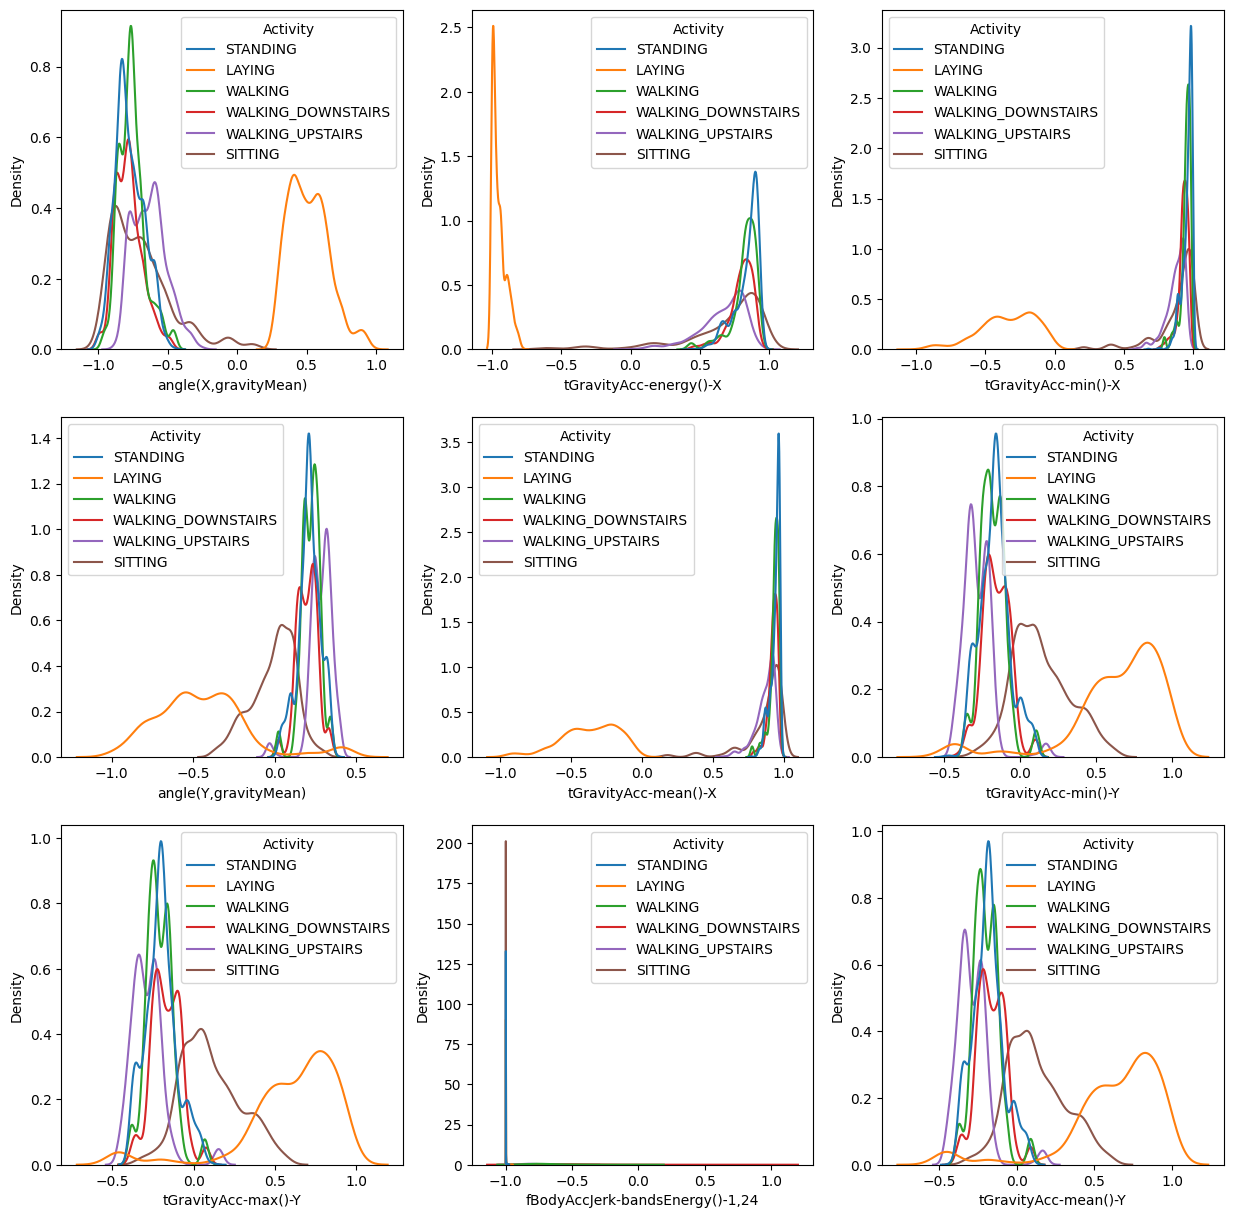

In [64]:
# 상위 중요도 변수들
plot_kde(top_features, target, data)

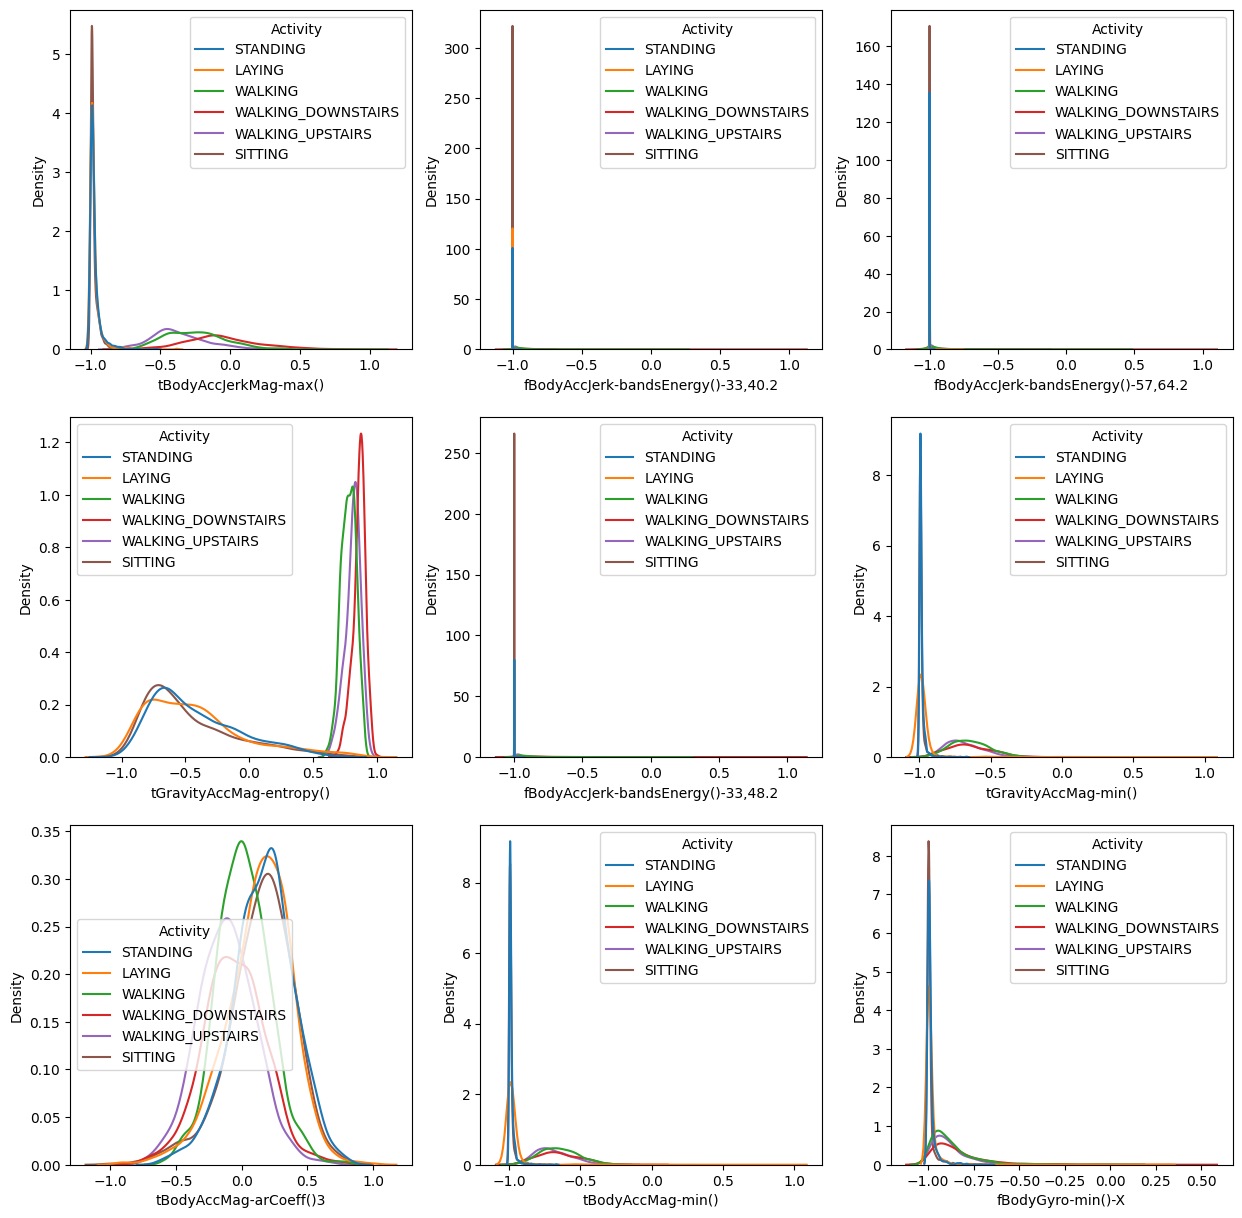

In [65]:
# 하위 중요도 변수들
plot_kde(bot_features, target, data)

### (3) feature 그룹별 분석

* **세부 요구사항**
    - 제공된 features.csv 에는 feature에 대한 계층구조를 정리해 놓았습니다.
    - features와 변수중요도 결과를 merge 하시오.
    - sensor 별 중요도 합계를 구하고 상위 변수 그룹별 비교 분석을 수행 하시오.
    - sensor + agg 별 중요도 합계를 구하고 상위 변수 그룹별 비교 분석을 수행 하시오.


In [66]:
features.head(2)

,sensor,agg,axis,feature_name
0,tBodyAcc,mean(),X,tBodyAcc-mean()-X
1,tBodyAcc,mean(),Y,tBodyAcc-mean()-Y


In [67]:
# 변수 중요도를 저장한 df의 col name을 feature_name으로 바꾸기
df.rename(columns={'name':'feature_name'}, inplace=True)
df.head(2)

,importance,feature_name
0,0.000070,tBodyAcc-mean()-X
1,0.000119,tBodyAcc-mean()-Y


In [68]:
features.shape

(561, 4)

In [69]:
# merge
features = pd.merge(features, df, how='inner', on='feature_name')
features.head(2)

,sensor,agg,axis,feature_name,importance
0,tBodyAcc,mean(),X,tBodyAcc-mean()-X,0.000070
1,tBodyAcc,mean(),Y,tBodyAcc-mean()-Y,0.000119


In [70]:
# sensor 별 중요도 합계를 구하고 상위 변수 그룹별 비교 분석을 수행
features.groupby('sensor')['importance'].sum().sort_values(ascending=False)

sensor
tGravityAcc             0.367745
fBodyAccJerk            0.111813
angle                   0.083153
fBodyAcc                0.071209
tBodyAccJerk            0.058449
fBodyGyro               0.055291
fBodyAccMag             0.046164
tBodyAccJerkMag         0.040226
tBodyAcc                0.038752
tBodyAccMag             0.037482
tGravityAccMag          0.032309
tBodyGyroJerk           0.026392
tBodyGyro               0.020991
fBodyBodyAccJerkMag     0.010688
tBodyGyroJerkMag        0.008677
fBodyBodyGyroMag        0.002222
fBodyBodyGyroJerkMag    0.001382
tBodyGyroMag            0.000476
Name: importance, dtype: float64

In [71]:
# sensor + agg 별 중요도 합계를 구하고 상위 변수 그룹별 비교 분석
features.groupby(['sensor', 'agg'])['importance'].sum().sort_values(ascending=False)[:10]

# features['sensor_agg'] = features['sensor']+'-'+features['agg']
# features['sensor_agg']

sensor        agg          
tGravityAcc   arCoeff()        0.085874
              min()            0.074554
              energy()         0.066126
fBodyAccJerk  bandsEnergy()    0.059909
tGravityAcc   mean()           0.058306
              max()            0.056228
angle         X                0.040161
              Y                0.031695
fBodyGyro     bandsEnergy()    0.023767
fBodyAcc      bandsEnergy()    0.021633
Name: importance, dtype: float64

## 4.데이터 분석 : 미션2

다음의 case에 맞게 feature 및 feature 그룹 중요도를 기반으로 탐색적 데이터 분석을 수행하시오.
* 1) Target을 **정적/동적 행동**으로 구분
    * 6개의 행동은 2개의 그룹(정적행동, 동적행동)으로 나뉩니다.  
    * 어떤 feature(혹은 feature 그룹)이 2개 class 그룹(정적행동, 동적행동)를 구분하는데 중요한지를 찾아보고 탐색해봅시다.
* 2) Target을 **개별 행동 여부**로 구분
    * 6가지의 행동을 분류하는 분석도 중요하지만, 개별 행동에만 특별히 영향을 받는 feature들도 있습니다.
    * 예를 들어, 계단을 오르는 행동(Walking_upstairs)과 관련이 큰 feature가 있을 것입니다. [계단을 오르는 행동]인지 아닌지로 구분하는 target을 추가하여 EDA를 수행해 봅시다.

### (1) 정적/동적 행동으로 구분하여 분석하기

* **세부 요구사항**
    - Target인 Activity를 is_dynamic 변수로 변경하시오.
        * 값 0 : STANDING, SITTING, LAYING
        * 값 1 : WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS
    - is_dynamic을 예측하기 위한 기본 모델을 생성하시오.
        * x, is_dynamic을 이용하여 train과 validation으로 데이터 분할
        * 기본 모델링
    - is_dynamic 을 구분하는데 중요한 변수 상위 5를 분석하시오.
    - is_dynamic 을 구분하는데 중요한 변수 그룹을 분석하시오.
        * sensor별
        * sensor+agg 별


#### 1) is_dynamic 추가

In [72]:
data['is_dynamic']= data['Activity'].replace(['STANDING', 'SITTING', 'LAYING'], 0)
data['is_dynamic']= data['is_dynamic'].replace({'WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS'}, 1)
data['is_dynamic'].unique()

array([0, 1])

#### 2) 기본모델 생성

In [73]:
target ='is_dynamic'
drop_cols = ['Activity', target]
X = data.drop(columns=drop_cols, axis=1)
Y = data.loc[:, target]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.1)

In [74]:
x_train.shape, x_test.shape

((5292, 562), (589, 562))

In [75]:
y_train

1939    1
368     0
4358    0
2926    0
93      1
       ..
1578    1
222     1
2804    0
5302    0
5718    0
Name: is_dynamic, Length: 5292, dtype: int64

In [76]:
model = RandomForestClassifier(max_depth=5)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5)

In [77]:
features.rename(columns={'importance':'activity_importance'}, inplace=True)
list(features)

['sensor', 'agg', 'axis', 'feature_name', 'activity_importance']

In [78]:
model.feature_importances_.shape

(562,)

In [79]:
df.shape

(562, 2)

In [80]:
# feature 에 추가
df2 = pd.DataFrame({})
df2['feature_name'] = x_train.columns
df2['is_dynamic_importance'] = model.feature_importances_
features = pd.merge(features, df2, on='feature_name', how='inner')
features.head()

,sensor,agg,axis,feature_name,activity_importance,is_dynamic_importance
0,tBodyAcc,mean(),X,tBodyAcc-mean()-X,0.000070,0.000008
1,tBodyAcc,mean(),Y,tBodyAcc-mean()-Y,0.000119,0.000015
2,tBodyAcc,mean(),Z,tBodyAcc-mean()-Z,0.000026,0.000023
3,tBodyAcc,std(),X,tBodyAcc-std()-X,0.001444,0.009916
4,tBodyAcc,std(),Y,tBodyAcc-std()-Y,0.000065,0.000011


#### 3) 변수중요도 상위 5개 분석

In [81]:
sorted_df = features.sort_values(by='is_dynamic_importance',ascending=False)
sorted_df[:5]

,sensor,agg,axis,feature_name,activity_importance,is_dynamic_importance
389,fBodyAccJerk,bandsEnergy(),"1,16","fBodyAccJerk-bandsEnergy()-1,16",0.008477,0.060137
347,fBodyAccJerk,std(),X,fBodyAccJerk-std()-X,0.002868,0.060099
360,fBodyAccJerk,energy(),X,fBodyAccJerk-energy()-X,0.007563,0.059977
353,fBodyAccJerk,max(),X,fBodyAccJerk-max()-X,0.000024,0.039997
366,fBodyAccJerk,entropy(),X,fBodyAccJerk-entropy()-X,0.007838,0.039939


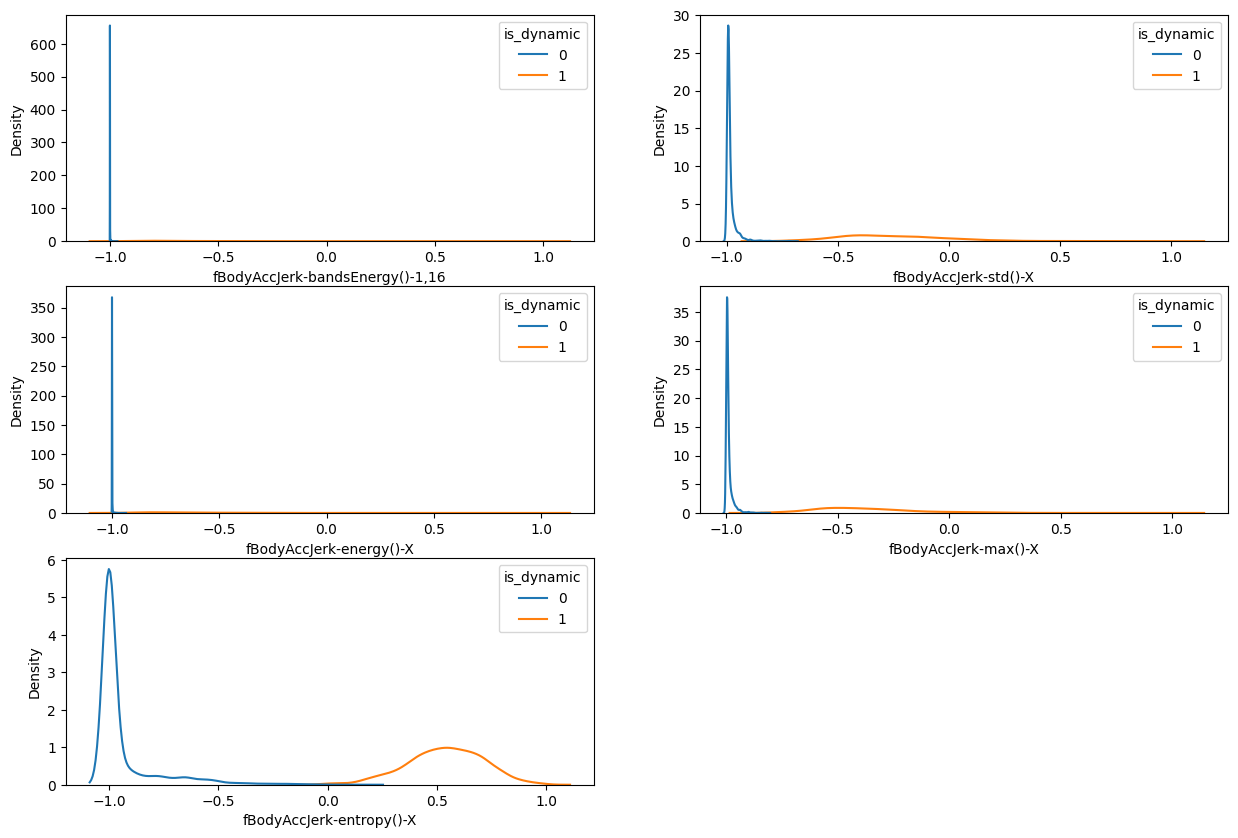

In [82]:
feature = [f for f in sorted_df['feature_name'][:5]]
plot_kde(feature, target='is_dynamic', data=data)

#### 4) feature 그룹별 분석

In [83]:
# sensor 별
features.groupby('sensor')['is_dynamic_importance'].sum().reset_index()

,sensor,is_dynamic_importance
0,angle,0.000387
1,fBodyAcc,0.090036
2,fBodyAccJerk,0.439770
3,fBodyAccMag,0.000032
4,fBodyBodyAccJerkMag,0.009931
5,fBodyBodyGyroJerkMag,0.000020
6,fBodyBodyGyroMag,0.000006
7,fBodyGyro,0.010038
8,tBodyAcc,0.049814
9,tBodyAccJerk,0.229669


In [84]:
# sensor+agg
features.groupby(['sensor', 'agg'])['is_dynamic_importance'].sum()

sensor          agg             
angle           X                   0.000227
                Y                   0.000000
                Z                   0.000159
                tBodyAccJerkMean    0.000000
                tBodyAccMean        0.000000
                                      ...   
tGravityAccMag  max()               0.000000
                mean()              0.000000
                min()               0.000000
                sma()               0.000000
                std()               0.000000
Name: is_dynamic_importance, Length: 221, dtype: float64

In [85]:
# 기존 feature들로만 분석하기 위해 새로운 feature 제거
data.drop(columns=['is_dynamic'], axis=1, inplace=True)

In [86]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,21,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,15,LAYING
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,11,STANDING
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,17,WALKING
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,17,WALKING_DOWNSTAIRS


In [87]:
data2 = data.copy()
series = data2['Activity'].replace('STANDING', 1)
series[series!=1] = 0
data2['is_standing'] =series
data2.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,is_standing
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,21,STANDING,1
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,15,LAYING,0
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,11,STANDING,1
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,17,WALKING,0
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,17,WALKING_DOWNSTAIRS,0


### (2) 개별 동작 분석 : is_standing


* **세부 요구사항**
    - Target인 Activity를 is_standing 변수로 변경하시오.
        * 값 1 : STANDING
        * 값 0 : 나머지
    - is_standing 을 예측하기 위한 기본 모델을 생성하시오.
        * x, is_standing 을 이용하여 train과 validation으로 데이터 분할
        * 기본 모델링
    - is_standing 을 구분하는데 중요한 변수 상위 5를 분석하시오.
    - is_standing 을 구분하는데 중요한 변수 그룹을 분석하시오.
        * sensor별
        * sensor+agg 별


In [88]:
data2 = data.copy()
features2 = features.copy()
def analize(new_feature, is_list, data, feature_df):
  # 관점에 따라 새로운 feature 생성
  temp = data['Activity'].replace(is_list, 1)
  temp[temp!=1] = 0
  data[new_feature] = temp.astype(int)

  # X, Y 나누기
  target = new_feature
  drop_cols = [new_feature, 'Activity']
  x_train = data.drop(columns=drop_cols, axis=1)
  y_train = data.loc[:,target]

  # 모델링
  model = RandomForestClassifier(max_depth=5)
  model.fit(x_train, y_train)

  # 중요도 feature dataframe과 merge
  temp = pd.DataFrame({})
  temp['feature_name'] = x_train.columns
  importance_name = new_feature+'_importance'
  temp[importance_name] = model.feature_importances_
  feature_df = pd.merge(feature_df, temp, on='feature_name', how='inner')

  # 중요도 top 5 변수 분석
  sorted_df = feature_df.sort_values(by=importance_name, ascending=False)
  top_features = list(sorted_df['feature_name'][:5])
  print('top 5 feature :', top_features)
  plot_kde(top_features, target='Activity', data= data)

  # sensor 별 중요도 합
  print('센서 별 중요도 합')
  display(feature_df.groupby(by='sensor')[importance_name].sum().sort_values(ascending=False)[:5])

  # sensor + agg 별 중요도 합
  print('센서 + 별 중요도 합')
  display(feature_df.groupby(by='sensor')[importance_name].sum().sort_values(ascending=False)[:5])
  data.drop(new_feature, axis=1, inplace=True)
  return feature_df

top 5 feature : ['tGravityAcc-mean()-Y', 'tGravityAcc-max()-Y', 'angle(Y,gravityMean)', 'tGravityAcc-min()-Y', 'tGravityAcc-mean()-Z']


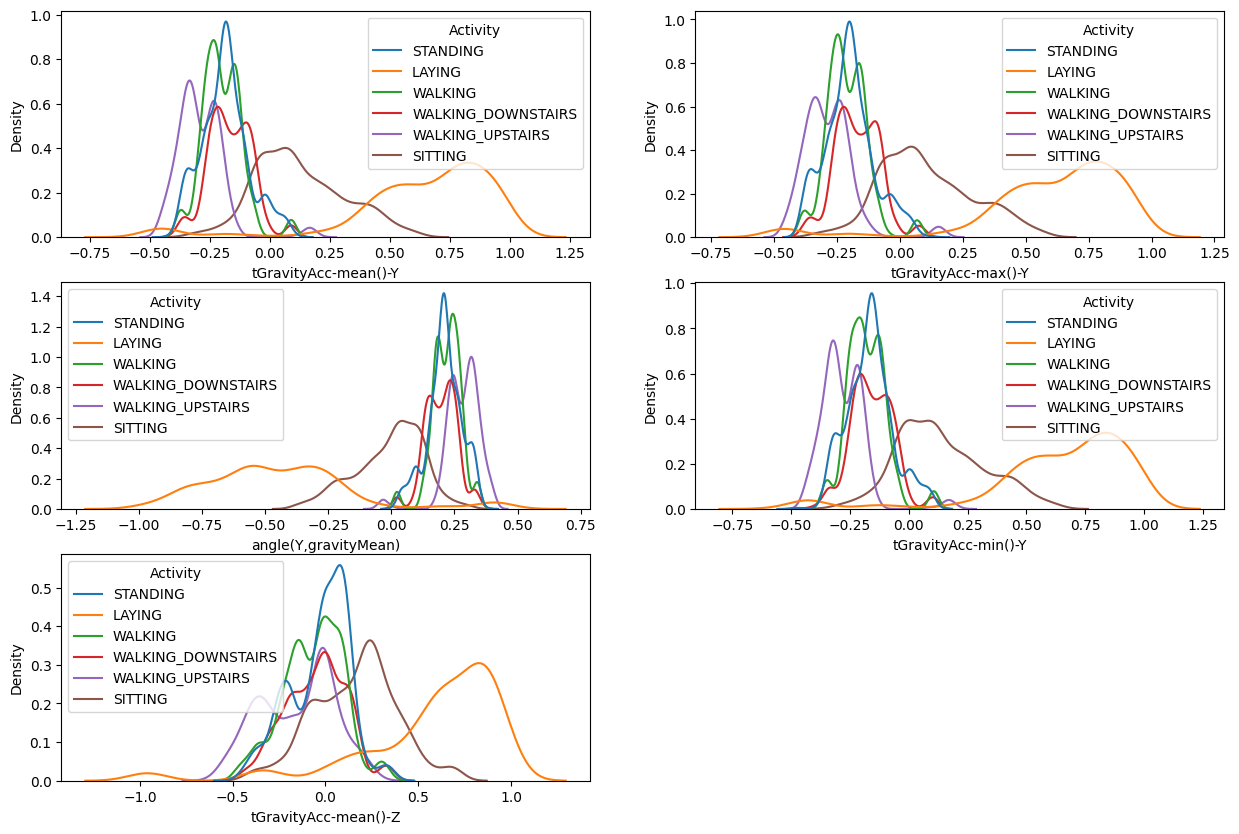

센서 별 중요도 합


sensor
tGravityAcc    0.436768
fBodyAcc       0.152638
angle          0.092732
fBodyGyro      0.079127
tBodyAcc       0.069394
Name: is_standing_importance, dtype: float64

센서 + 별 중요도 합


sensor
tGravityAcc    0.436768
fBodyAcc       0.152638
angle          0.092732
fBodyGyro      0.079127
tBodyAcc       0.069394
Name: is_standing_importance, dtype: float64

In [89]:

features = analize(new_feature='is_standing', is_list=['STANDING'], data=data, feature_df= features)

In [90]:
features

,sensor,agg,axis,feature_name,activity_importance,is_dynamic_importance,is_standing_importance
0,tBodyAcc,mean(),X,tBodyAcc-mean()-X,0.000070,0.000008,0.000000
1,tBodyAcc,mean(),Y,tBodyAcc-mean()-Y,0.000119,0.000015,0.000065
2,tBodyAcc,mean(),Z,tBodyAcc-mean()-Z,0.000026,0.000023,0.000235
3,tBodyAcc,std(),X,tBodyAcc-std()-X,0.001444,0.009916,0.006972
4,tBodyAcc,std(),Y,tBodyAcc-std()-Y,0.000065,0.000011,0.005651
...,...,...,...,...,...,...,...
556,angle,tBodyGyroMean,gravityMean,"angle(tBodyGyroMean,gravityMean)",0.000000,0.000000,0.000149
557,angle,tBodyGyroJerkMean,gravityMean,"angle(tBodyGyroJerkMean,gravityMean)",0.000221,0.000000,0.001700
558,angle,X,gravityMean,"angle(X,gravityMean)",0.040161,0.000227,0.015665
559,angle,Y,gravityMean,"angle(Y,gravityMean)",0.031695,0.000000,0.050304


### (3) 개별 동작 분석 : is_sitting


* **세부 요구사항**
    - Target인 Activity를 is_sitting 변수로 변경하시오.
        * 값 1 : SITTING
        * 값 0 : 나머지
    - is_sitting 을 예측하기 위한 기본 모델을 생성하시오.
        * x, is_sitting 을 이용하여 train과 validation으로 데이터 분할
        * 기본 모델링
    - is_sitting 을 구분하는데 중요한 변수 상위 5를 분석하시오.
    - is_sitting 을 구분하는데 중요한 변수 그룹을 분석하시오.
        * sensor별
        * sensor+agg 별


top 5 feature : ['tGravityAcc-max()-Y', 'angle(Y,gravityMean)', 'tGravityAcc-mean()-Y', 'tGravityAcc-energy()-X', 'tGravityAcc-min()-Y']


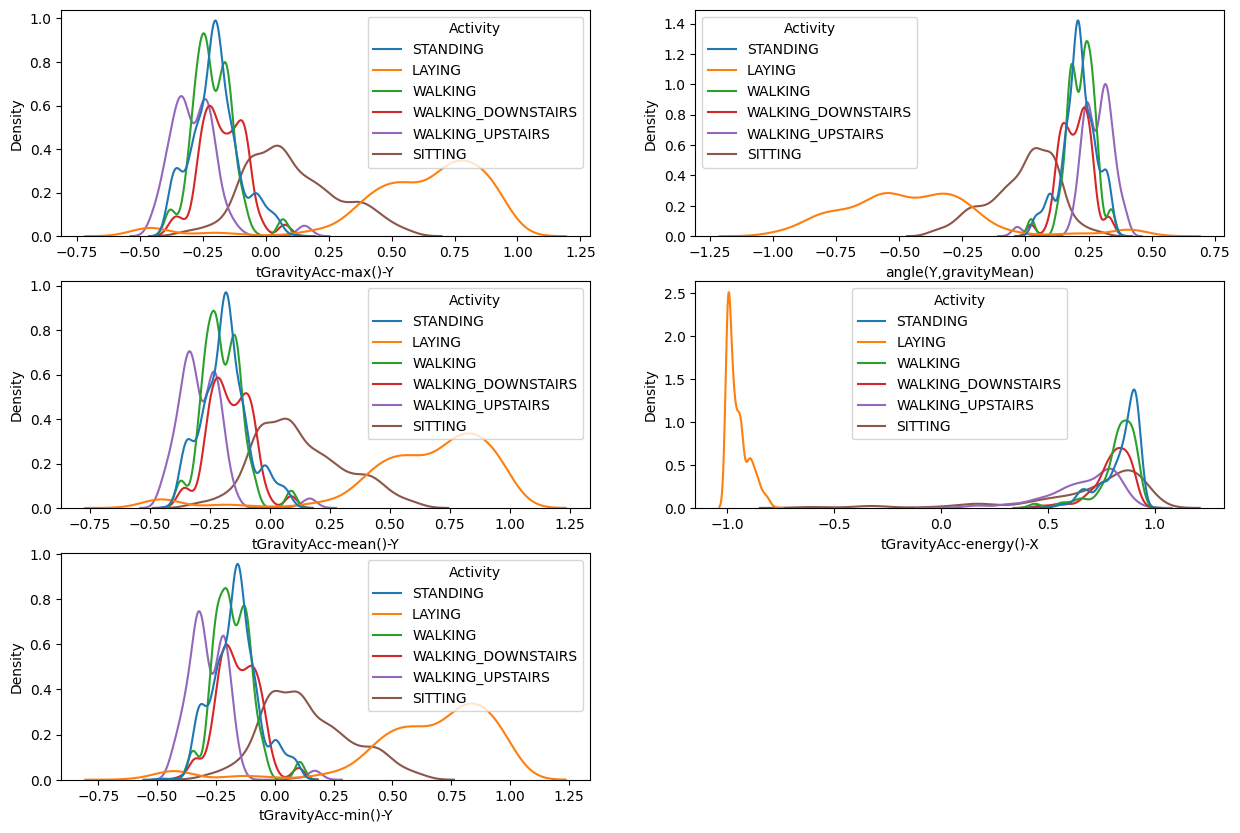

센서 별 중요도 합


sensor
tGravityAcc      0.373222
fBodyGyro        0.309114
angle            0.099460
tBodyGyroJerk    0.083539
tBodyGyro        0.081551
Name: is_sitting_importance, dtype: float64

센서 + 별 중요도 합


sensor
tGravityAcc      0.373222
fBodyGyro        0.309114
angle            0.099460
tBodyGyroJerk    0.083539
tBodyGyro        0.081551
Name: is_sitting_importance, dtype: float64

In [91]:
features = analize(new_feature='is_sitting', is_list=['SITTING'], data=data, feature_df= features)

In [92]:
features.head(2)

,sensor,agg,axis,feature_name,activity_importance,is_dynamic_importance,is_standing_importance,is_sitting_importance
0,tBodyAcc,mean(),X,tBodyAcc-mean()-X,0.000070,0.000008,0.000000,0.000082
1,tBodyAcc,mean(),Y,tBodyAcc-mean()-Y,0.000119,0.000015,0.000065,0.000291


### (4) 개별 동작 분석 : is_laying


* **세부 요구사항**
    - Target인 Activity를 is_laying 변수로 변경하시오.
        * 값 1 : LAYING
        * 값 0 : 나머지
    - is_laying 을 예측하기 위한 기본 모델을 생성하시오.
        * x, is_laying 을 이용하여 train과 validation으로 데이터 분할
        * 기본 모델링
    - is_laying 을 구분하는데 중요한 변수 상위 5를 분석하시오.
    - is_laying 을 구분하는데 중요한 변수 그룹을 분석하시오.
        * sensor별
        * sensor+agg 별


top 5 feature : ['tGravityAcc-mean()-X', 'angle(X,gravityMean)', 'tGravityAcc-max()-X', 'tGravityAcc-min()-X', 'tGravityAcc-mean()-Y']


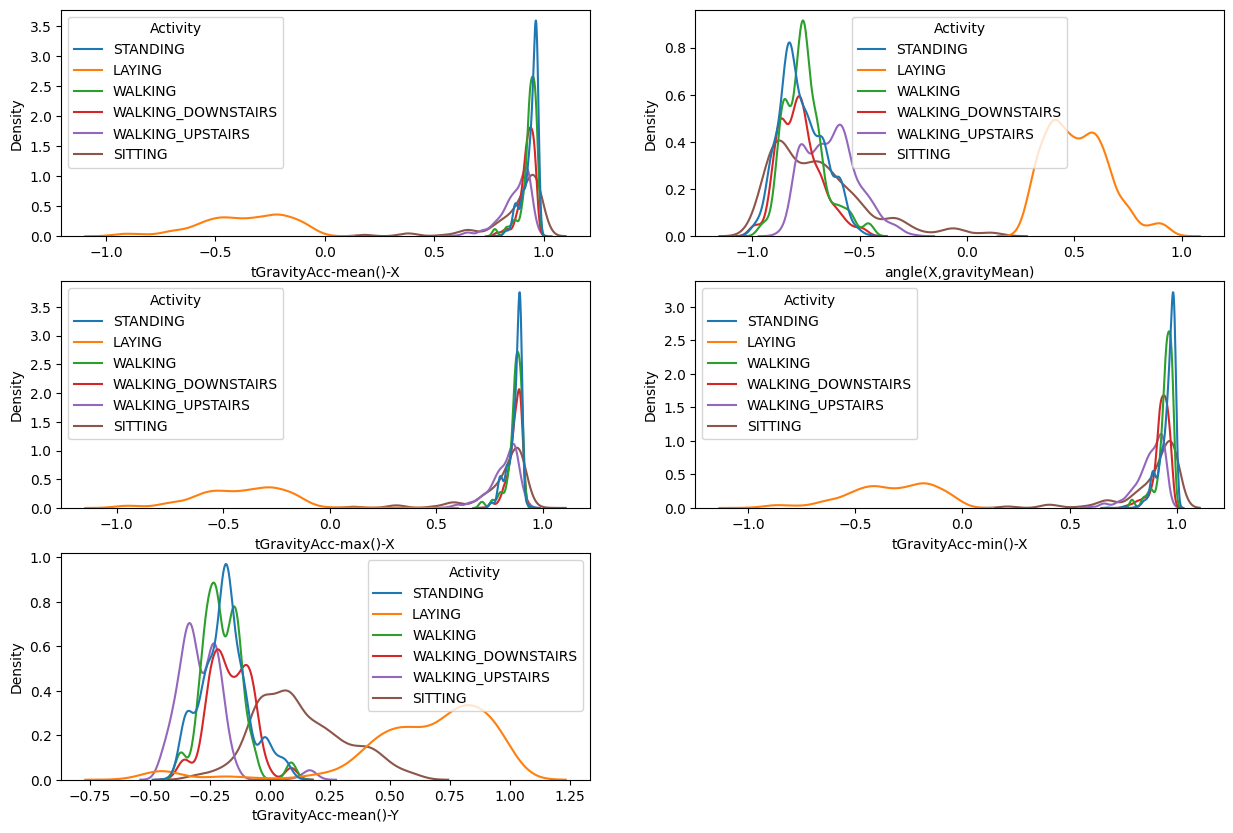

센서 별 중요도 합


sensor
tGravityAcc    0.650537
angle          0.190577
fBodyAcc       0.026252
tBodyAcc       0.026172
tBodyGyro      0.025289
Name: is_laying_importance, dtype: float64

센서 + 별 중요도 합


sensor
tGravityAcc    0.650537
angle          0.190577
fBodyAcc       0.026252
tBodyAcc       0.026172
tBodyGyro      0.025289
Name: is_laying_importance, dtype: float64

,sensor,agg,axis,feature_name,activity_importance,is_dynamic_importance,is_standing_importance,is_sitting_importance,is_laying_importance
0,tBodyAcc,mean(),X,tBodyAcc-mean()-X,0.000070,0.000008,0.000000,0.000082,0.000056
1,tBodyAcc,mean(),Y,tBodyAcc-mean()-Y,0.000119,0.000015,0.000065,0.000291,0.000044


In [93]:
features = analize(new_feature='is_laying', is_list=['LAYING'], data=data, feature_df= features)
features.head(2)

### (5) 개별 동작 분석 : is_walking


* **세부 요구사항**
    - Target인 Activity를 is_walking 변수로 변경하시오.
        * 값 1 : WALKING
        * 값 0 : 나머지
    - is_walking 을 예측하기 위한 기본 모델을 생성하시오.
        * x, is_walking 을 이용하여 train과 validation으로 데이터 분할
        * 기본 모델링
    - is_walking 을 구분하는데 중요한 변수 상위 5를 분석하시오.
    - is_walking 을 구분하는데 중요한 변수 그룹을 분석하시오.
        * sensor별
        * sensor+agg 별


top 5 feature : ['fBodyAccMag-std()', 'fBodyAccJerk-bandsEnergy()-1,24.1', 'tBodyGyroJerk-mad()-X', 'tGravityAcc-arCoeff()-Y,1', 'tGravityAcc-arCoeff()-X,1']


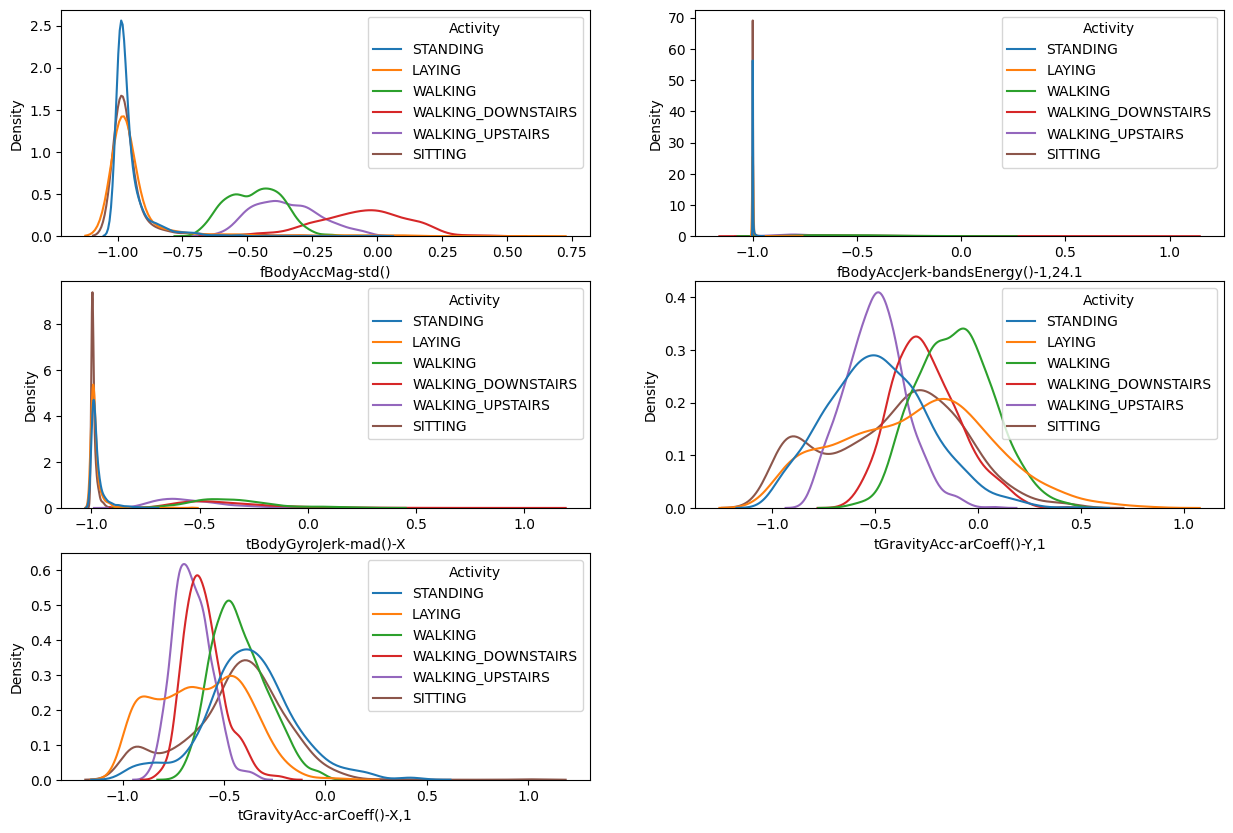

센서 별 중요도 합


sensor
tGravityAcc     0.163454
fBodyAcc        0.127384
fBodyAccJerk    0.124790
fBodyGyro       0.095045
fBodyAccMag     0.086737
Name: is_walking_importance, dtype: float64

센서 + 별 중요도 합


sensor
tGravityAcc     0.163454
fBodyAcc        0.127384
fBodyAccJerk    0.124790
fBodyGyro       0.095045
fBodyAccMag     0.086737
Name: is_walking_importance, dtype: float64

,sensor,agg,axis,feature_name,activity_importance,is_dynamic_importance,is_standing_importance,is_sitting_importance,is_laying_importance,is_walking_importance
0,tBodyAcc,mean(),X,tBodyAcc-mean()-X,0.000070,0.000008,0.000000,0.000082,0.000056,0.0
1,tBodyAcc,mean(),Y,tBodyAcc-mean()-Y,0.000119,0.000015,0.000065,0.000291,0.000044,0.0


In [94]:
features = analize(new_feature='is_walking', is_list=['WALKING'], data=data, feature_df= features)
features.head(2)

### (6) 개별 동작 분석 : is_walking_up


* **세부 요구사항**
    - Target인 Activity를 is_walking_up 변수로 변경하시오.
        * 값 1 : WALKING_UPSTAIRS
        * 값 0 : 나머지
    - is_walking_up 을 예측하기 위한 기본 모델을 생성하시오.
        * x, is_walking_up 을 이용하여 train과 validation으로 데이터 분할
        * 기본 모델링
    - is_walking_up 을 구분하는데 중요한 변수 상위 5를 분석하시오.
    - is_walking_up 을 구분하는데 중요한 변수 그룹을 분석하시오.
        * sensor별
        * sensor+agg 별


top 5 feature : ['fBodyAccJerk-maxInds-Z', 'tGravityAcc-min()-Y', 'tGravityAcc-arCoeff()-Z,3', 'tGravityAcc-arCoeff()-Z,2', 'tGravityAcc-arCoeff()-Y,1']


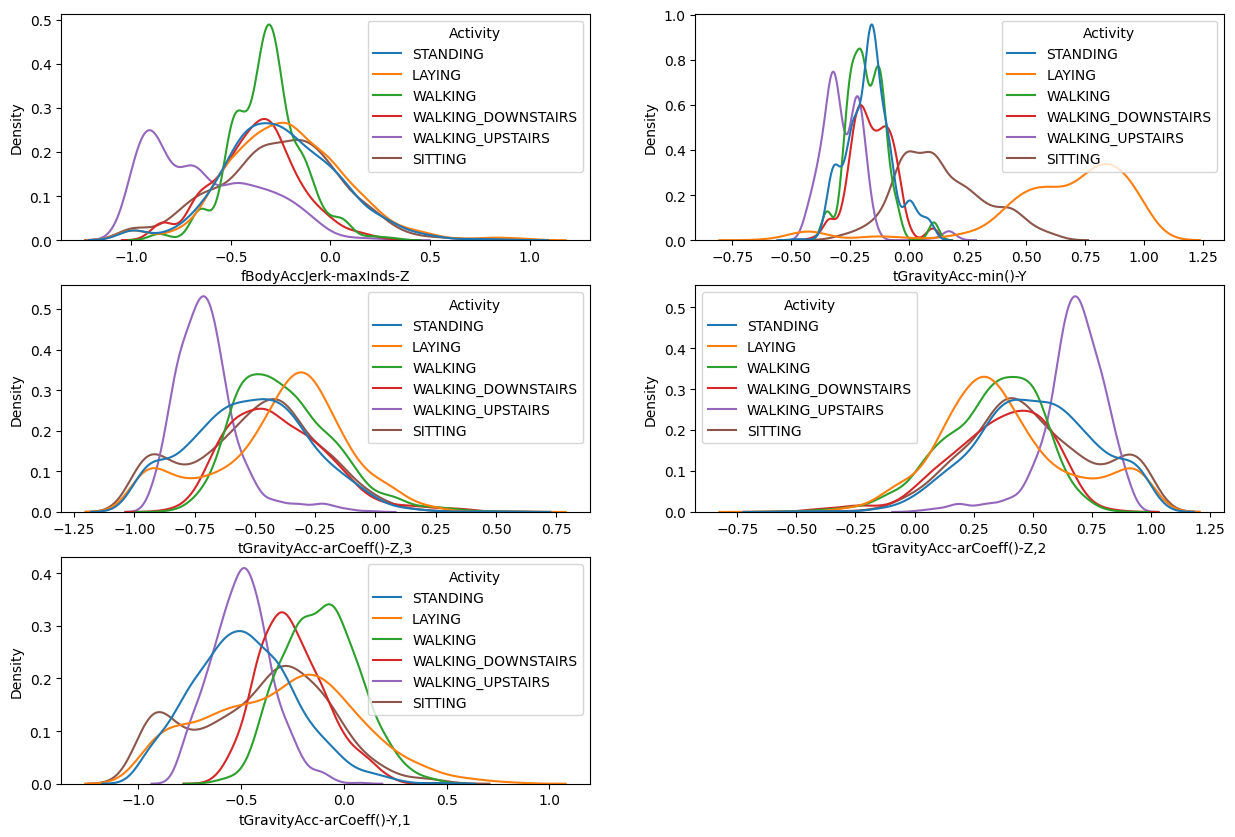

센서 별 중요도 합


sensor
tGravityAcc     0.269566
fBodyAcc        0.191178
fBodyAccJerk    0.147417
fBodyGyro       0.052328
tBodyAcc        0.047700
Name: is_walking_up_importance, dtype: float64

센서 + 별 중요도 합


sensor
tGravityAcc     0.269566
fBodyAcc        0.191178
fBodyAccJerk    0.147417
fBodyGyro       0.052328
tBodyAcc        0.047700
Name: is_walking_up_importance, dtype: float64

,sensor,agg,axis,feature_name,activity_importance,is_dynamic_importance,is_standing_importance,is_sitting_importance,is_laying_importance,is_walking_importance,is_walking_up_importance
0,tBodyAcc,mean(),X,tBodyAcc-mean()-X,0.000070,0.000008,0.000000,0.000082,0.000056,0.0,0.000000
1,tBodyAcc,mean(),Y,tBodyAcc-mean()-Y,0.000119,0.000015,0.000065,0.000291,0.000044,0.0,0.000588


In [95]:
features = analize(new_feature='is_walking_up', is_list=['WALKING_UPSTAIRS'], data=data, feature_df= features)
features.head(2)

### (7) 개별 동작 분석 : is_walking_down


* **세부 요구사항**
    - Target인 Activity를 is_walking_down 변수로 변경하시오.
        * 값 1 : WALKING_DOWNSTAIRS
        * 값 0 : 나머지
    - is_walking_down 을 예측하기 위한 기본 모델을 생성하시오.
        * x, is_walking_down 을 이용하여 train과 validation으로 데이터 분할
        * 기본 모델링
    - is_walking_down 을 구분하는데 중요한 변수 상위 5를 분석하시오.
    - is_walking_down 을 구분하는데 중요한 변수 그룹을 분석하시오.
        * sensor별
        * sensor+agg 별


top 5 feature : ['fBodyAccMag-energy()', 'tBodyAccMag-std()', 'fBodyAccMag-std()', 'tBodyAcc-energy()-X', 'fBodyAccMag-sma()']


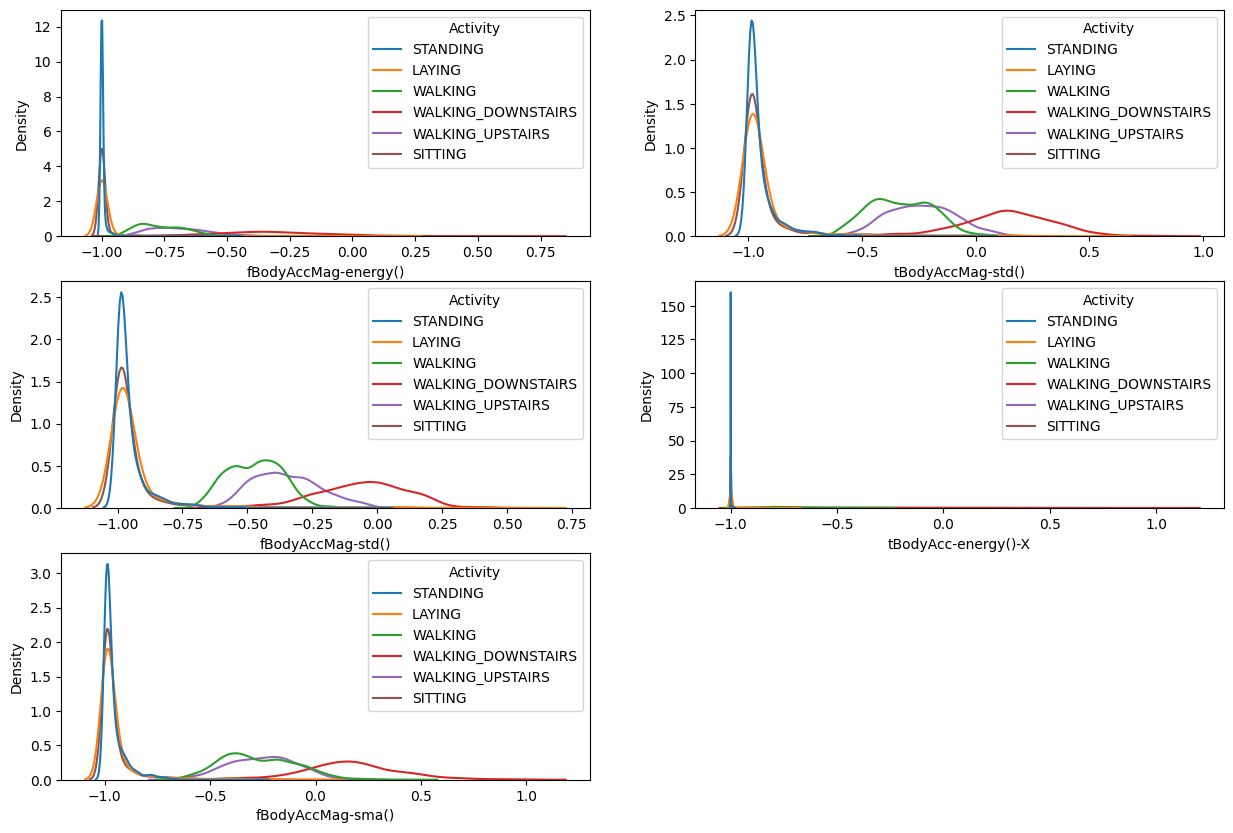

센서 별 중요도 합


sensor
fBodyAccMag     0.210287
fBodyAcc        0.166448
tBodyAccMag     0.126298
tBodyAcc        0.107702
fBodyAccJerk    0.107250
Name: is_walking_down_importance, dtype: float64

센서 + 별 중요도 합


sensor
fBodyAccMag     0.210287
fBodyAcc        0.166448
tBodyAccMag     0.126298
tBodyAcc        0.107702
fBodyAccJerk    0.107250
Name: is_walking_down_importance, dtype: float64

,sensor,agg,axis,feature_name,activity_importance,is_dynamic_importance,is_standing_importance,is_sitting_importance,is_laying_importance,is_walking_importance,is_walking_up_importance,is_walking_down_importance
0,tBodyAcc,mean(),X,tBodyAcc-mean()-X,0.000070,0.000008,0.000000,0.000082,0.000056,0.0,0.000000,0.00000
1,tBodyAcc,mean(),Y,tBodyAcc-mean()-Y,0.000119,0.000015,0.000065,0.000291,0.000044,0.0,0.000588,0.00007


In [96]:
features = analize(new_feature='is_walking_down', is_list=['WALKING_DOWNSTAIRS'], data=data, feature_df= features)
features.head(2)

## 5.특성 중요도 저장하기

* **세부 요구사항**
    - 지금까지 변수 중요도를 다양한 관점에서 뽑고 분석을 해 보았습니다.
        - 관점1 : 6개 행동 구분
        - 관점2 : 동적, 정적 행동 구분
        - 관점3 : Standing 여부 구분
        - 관점4 : Sitting 여부 구분
        - 관점5 : Laying 여부 구분
        - 관점6 : Walking 여부 구분
        - 관점7 : Walking_upstairs 여부 구분
        - 관점8 : Walking_downstairs 여부 구분
    - 모든 관점의 변수 중요도를 하나로 합친 후 저장
        - merge를 이용하여 features와 합칩니다.
        - joblib 패키지의 dump를 이용하여 결과를 저장합니다.

### (1) 하나로 합치기
* 합치기 위해서는 중요도 결과에서 feature_importance 칼럼 이름을 수정해야 합니다.
* pd.merge를 이용해서 하나씩 합치는 작업을 반복 합니다.

In [97]:
features.head(5)

,sensor,agg,axis,feature_name,activity_importance,is_dynamic_importance,is_standing_importance,is_sitting_importance,is_laying_importance,is_walking_importance,is_walking_up_importance,is_walking_down_importance
0,tBodyAcc,mean(),X,tBodyAcc-mean()-X,0.000070,0.000008,0.000000,0.000082,0.000056,0.000000,0.000000,0.000000
1,tBodyAcc,mean(),Y,tBodyAcc-mean()-Y,0.000119,0.000015,0.000065,0.000291,0.000044,0.000000,0.000588,0.000070
2,tBodyAcc,mean(),Z,tBodyAcc-mean()-Z,0.000026,0.000023,0.000235,0.000094,0.000000,0.000009,0.000044,0.000016
3,tBodyAcc,std(),X,tBodyAcc-std()-X,0.001444,0.009916,0.006972,0.000096,0.001053,0.011072,0.004901,0.021009
4,tBodyAcc,std(),Y,tBodyAcc-std()-Y,0.000065,0.000011,0.005651,0.000095,0.000000,0.000192,0.000120,0.000668


### (2) 저장하기
* joblib.dump를 이용하시오.
* 저장할 파일의 확장자는 보통 .pkl 입니다.

In [98]:
# joblib.dump(features,'features_df.pkl')

In [99]:
# 중요도가 높은 변수만 추출
top_features = []
for col in features.columns[-8:]:
  # 정렬
  top_features += list(features.sort_values(by= col, ascending=False)[:5]['feature_name'])

In [100]:
top_features = set(top_features)
top_features = list(top_features)
top_features

['fBodyAccJerk-max()-X',
 'tGravityAcc-max()-Y',
 'fBodyAccJerk-bandsEnergy()-1,24.1',
 'tBodyAccMag-std()',
 'tGravityAcc-mean()-X',
 'tBodyGyroJerk-mad()-X',
 'tGravityAcc-energy()-X',
 'tGravityAcc-arCoeff()-Y,1',
 'tGravityAcc-arCoeff()-Z,2',
 'tGravityAcc-mean()-Y',
 'fBodyAccJerk-std()-X',
 'tBodyAcc-energy()-X',
 'tGravityAcc-min()-X',
 'fBodyAccMag-energy()',
 'tGravityAcc-max()-X',
 'tGravityAcc-min()-Y',
 'tGravityAcc-arCoeff()-X,1',
 'fBodyAccJerk-entropy()-X',
 'fBodyAccMag-std()',
 'fBodyAccJerk-bandsEnergy()-1,16',
 'tGravityAcc-arCoeff()-Z,3',
 'angle(X,gravityMean)',
 'fBodyAccJerk-energy()-X',
 'fBodyAccJerk-maxInds-Z',
 'tGravityAcc-mean()-Z',
 'fBodyAccMag-sma()',
 'angle(Y,gravityMean)']

In [101]:
top_data = data.loc[:, top_features]
top_data['Activity'] = data['Activity']
top_data

,fBodyAccJerk-max()-X,tGravityAcc-max()-Y,"fBodyAccJerk-bandsEnergy()-1,24.1",tBodyAccMag-std(),tGravityAcc-mean()-X,tBodyGyroJerk-mad()-X,tGravityAcc-energy()-X,"tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Z,2",tGravityAcc-mean()-Y,...,fBodyAccMag-std(),"fBodyAccJerk-bandsEnergy()-1,16","tGravityAcc-arCoeff()-Z,3","angle(X,gravityMean)",fBodyAccJerk-energy()-X,fBodyAccJerk-maxInds-Z,tGravityAcc-mean()-Z,fBodyAccMag-sma(),"angle(Y,gravityMean)",Activity
0,-0.991791,-0.370494,-0.999708,-0.981876,0.875254,-0.986107,0.673768,-0.353349,0.386323,-0.358842,...,-0.981567,-0.999952,-0.385893,-0.601120,-0.999830,-0.64,-0.205765,-0.985206,0.331298,STANDING
1,-0.994706,0.873312,-0.999908,-0.990870,-0.134711,-0.992184,-0.893830,-0.056969,-0.019327,0.924656,...,-0.992435,-0.999946,0.017077,0.345205,-0.999893,-0.48,0.234498,-0.989450,-0.769186,LAYING
2,-0.996958,-0.195671,-0.999491,-0.992562,0.965965,-0.984787,0.906252,0.100429,-0.044970,-0.174095,...,-0.994252,-0.999978,0.015440,-0.833564,-0.999948,0.08,0.078530,-0.990805,0.202434,STANDING
3,-0.378207,-0.309430,-0.678856,-0.459911,0.927343,-0.363761,0.805419,-0.290450,0.392060,-0.297703,...,-0.575620,-0.726715,-0.430046,-0.695819,-0.708292,-0.44,-0.129686,-0.407268,0.287154,WALKING
4,-0.355447,-0.236084,-0.804809,0.152179,0.901125,-0.554993,0.738738,-0.577442,0.780440,-0.260540,...,-0.049606,-0.596334,-0.790986,-0.705029,-0.633466,-0.48,-0.163806,0.191831,0.264952,WALKING_DOWNSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,-0.993599,-0.063552,-0.999691,-0.957837,0.973223,-0.982241,0.925506,-0.518016,0.646874,-0.044093,...,-0.955713,-0.999963,-0.644223,-0.912365,-0.999899,-0.80,-0.083722,-0.973183,0.114009,SITTING
5877,-0.488323,-0.325357,-0.667505,-0.257045,0.910932,-0.483917,0.763412,-0.216413,0.384184,-0.317517,...,-0.382391,-0.695006,-0.397212,-0.690278,-0.730224,-0.96,0.094548,-0.239409,0.303194,WALKING_UPSTAIRS
5878,-0.991168,0.639925,-0.999821,-0.992243,-0.514220,-0.990440,-0.998561,-0.005114,0.136120,0.684910,...,-0.994649,-0.999936,-0.149603,0.620363,-0.999797,0.16,0.755319,-0.989778,-0.437247,LAYING
5879,-0.408555,-0.314572,-0.650324,-0.218965,0.921553,-0.457338,0.790552,-0.452944,0.719650,-0.302780,...,-0.315389,-0.698184,-0.738898,-0.718009,-0.682699,-0.44,-0.004555,-0.265055,0.292856,WALKING_UPSTAIRS


In [102]:
# joblib.dump(top_data,project_path+'top_data.pkl')

In [103]:
data = pd.read_csv(project_path+'data01_train.csv')
features = pd.read_csv(project_path + 'features.csv')

In [104]:
data.head(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,21,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,15,LAYING


In [105]:
features.head(2)

,sensor,agg,axis,feature_name
0,tBodyAcc,mean(),X,tBodyAcc-mean()-X
1,tBodyAcc,mean(),Y,tBodyAcc-mean()-Y


* **세부 요구사항**
    - 지금까지 변수 중요도를 다양한 관점에서 뽑고 분석을 해 보았습니다.
        - 관점1 : 6개 행동 구분
        - 관점2 : 동적, 정적 행동 구분
        - 관점3 : Standing 여부 구분
        - 관점4 : Sitting 여부 구분
        - 관점5 : Laying 여부 구분
        - 관점6 : Walking 여부 구분
        - 관점7 : Walking_upstairs 여부 구분
        - 관점8 : Walking_downstairs 여부 구분
    - 모든 관점의 변수 중요도를 하나로 합친 후 저장
        - merge를 이용하여 features와 합칩니다.
        - joblib 패키지의 dump를 이용하여 결과를 저장합니다.

#**스마트폰 센서 데이터 기반 모션 분류**
# 단계2 : 기본 모델링


## 0.미션

* 데이터 전처리
    * 가변수화, 데이터 분할, NaN 확인 및 조치, 스케일링 등 필요한 전처리 수행
* 다양한 알고리즘으로 분류 모델 생성
    * 최소 4개 이상의 알고리즘을 적용하여 모델링 수행
    * 성능 비교
    * 각 모델의 성능을 저장하는 별도 데이터 프레임을 만들고 비교
* 옵션 : 다음 사항은 선택사항입니다. 시간이 허용하는 범위 내에서 수행하세요.
    * 상위 N개 변수를 선정하여 모델링 및 성능 비교
        * 모델링에 항상 모든 변수가 필요한 것은 아닙니다.
        * 변수 중요도 상위 N개를 선정하여 모델링하고 타 모델과 성능을 비교하세요.
        * 상위 N개를 선택하는 방법은, 변수를 하나씩 늘려가며 모델링 및 성능 검증을 수행하여 적절한 지점을 찾는 것입니다.

## 1.환경설정

### (1) 라이브러리 불러오기

* 세부 요구사항
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 분류 머신러닝 모델
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# 딥러닝
from keras.backend import clear_session
from keras.models import Sequential, Model
from keras.layers import Input, Dense, SimpleRNN, LSTM, concatenate
from keras.optimizers import Adam

# 분류 평가 지표
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

# 검증, 하이퍼 파라미터 튜닝
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV, train_test_split




* 함수 생성

In [107]:
# 변수의 특성 중요도 계산하기
def plot_feature_importance(importance, names, result_only = False, topn = 'all'):
    feature_importance = np.array(importance)
    feature_name = np.array(names)

    data={'feature_name':feature_name,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    #변수의 특성 중요도 순으로 정렬하기
    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    #변수의 특성 중요도 그래프로 그리기
    if result_only == False :
        plt.figure(figsize=(10,20))
        sns.barplot(x='feature_importance', y='feature_name', data = fi_df)

        plt.xlabel('importance')
        plt.ylabel('feature name')
        plt.grid()

    return fi_df

### (2) 데이터 불러오기

* 주어진 데이터셋
    * data01_train.csv : 학습 및 검증용
* 세부 요구사항
    - 전체 데이터 'data01_train.csv' 를 불러와 'data' 이름으로 저장합니다.
        - data에서 변수 subject는 삭제합니다.
    - 데이터프레임에 대한 기본 정보를 확인합니다.( .head(), .shape 등)

#### 1) 데이터 로딩

In [108]:
import joblib
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
project_path = '/content/drive/MyDrive/미니 프로젝트/'
# top data
# data = joblib.load(project_path+'top_data.pkl')
# 일반 데이터
features = joblib.load(project_path+'features_df.pkl')
data = pd.read_csv(project_path+'data01_train.csv')
# data_test = pd.read_csv(project_path+'data01_test.csv')

#### 2) 기본 정보 조회

In [110]:
data.shape, data_test.shape

((5881, 563), (1471, 563))

In [111]:
data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,...,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000
mean,0.274811,-0.017799,-0.109396,-0.603138,-0.509815,-0.604058,-0.628151,-0.525944,-0.605374,-0.465490,...,-0.305883,-0.623548,0.008524,-0.001185,0.009340,-0.007099,-0.491501,0.059299,-0.054594,17.381568
std,0.067614,0.039422,0.058373,0.448807,0.501815,0.417319,0.424345,0.485115,0.413043,0.544995,...,0.322808,0.310371,0.339730,0.447197,0.608190,0.476738,0.509069,0.297340,0.278479,8.938316
min,-0.503823,-0.684893,-1.000000,-1.000000,-0.999844,-0.999667,-1.000000,-0.999419,-1.000000,-1.000000,...,-0.979261,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.980143,1.000000
25%,0.262919,-0.024877,-0.121051,-0.992774,-0.977680,-0.980127,-0.993602,-0.977865,-0.980112,-0.936067,...,-0.541969,-0.845985,-0.122361,-0.294369,-0.481718,-0.373345,-0.811397,-0.018203,-0.141555,8.000000
50%,0.277154,-0.017221,-0.108781,-0.943933,-0.844575,-0.856352,-0.948501,-0.849266,-0.849896,-0.878729,...,-0.342923,-0.712677,0.010278,0.005146,0.011448,-0.000847,-0.709441,0.182893,0.003951,19.000000
75%,0.288526,-0.010920,-0.098163,-0.242130,-0.034499,-0.262690,-0.291138,-0.068857,-0.268539,-0.013690,...,-0.127371,-0.501158,0.154985,0.285030,0.499857,0.356236,-0.511330,0.248435,0.111932,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,0.977344,0.478157,1.000000,30.000000


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5881 entries, 0 to 5880
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 25.3+ MB


## **2. 데이터 전처리**

* 가변수화, 데이터 분할, NaN 확인 및 조치, 스케일링 등 필요한 전처리를 수행한다.


### (1) 데이터 분할1 : x, y

* 세부 요구사항
    - x, y로 분할합니다.

In [113]:
target = 'Activity'

x = data.drop(target, axis=1)
y = data.loc[:, target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

### (2) 스케일링(필요시)


* 세부 요구사항
    - 스케일링을 필요로 하는 알고리즘 사용을 위해서 코드 수행
    - min-max 방식 혹은 standard 방식 중 한가지 사용.

In [114]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### (3) 데이터분할2 : train, validation

* 세부 요구사항
    - train : val = 8 : 2 혹은 7 : 3
    - random_state 옵션을 사용하여 다른 모델과 비교를 위해 성능이 재현되도록 합니다.

## **3. 기본 모델링**



* 세부 요구사항
    - 최소 4개 이상의 알고리즘을 적용하여 모델링을 수행한다.
    - 각 알고리즘별로 전체 변수로 모델링, 상위 N개 변수를 선택하여 모델링을 수행하고 성능 비교를 한다.
    - (옵션) 알고리즘 중 1~2개에 대해서, 변수 중요도 상위 N개를 선정하여 모델링하고 타 모델과 성능을 비교.
        * 상위 N개를 선택하는 방법은, 변수를 하나씩 늘려가며 모델링 및 성능 검증을 수행하여 적절한 지점을 찾는 것이다.

### (1) 알고리즘1 : LinearRegression

In [115]:
y_train.unique()

array(['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'LAYING',
       'SITTING', 'STANDING'], dtype=object)

In [116]:
# y_train_copy = y_train.copy()
y_train = y_train.map({'STANDING':0,
             'LAYING':1,
             'WALKING':2,
             'WALKING_DOWNSTAIRS':3,
             'WALKING_UPSTAIRS':4,
             'SITTING':5})
y_train

1049    2
1393    4
4836    3
4953    2
5031    1
       ..
977     5
983     3
362     1
296     0
917     2
Name: Activity, Length: 5292, dtype: int64

In [117]:
model = LinearRegression()
cv_score = cross_val_score(model, x_train, y_train, cv=10)

In [118]:
cv_score.mean()

0.7089547168953251

In [119]:
def get_cv_score(name, model, score_name, cv=10):
  cv_score = cross_val_score(model, x_train, y_train, cv=cv, verbose=0)
  result.loc[result['name']==name, score_name] = cv_score.mean()
  print(f'{name} cv score : ',cv_score.mean())

In [120]:
result = pd.DataFrame({})
result['name'] = ['LR', 'KNN', 'DT', 'RF', 'XGB', 'LGBM', 'SVM']
result['cv_score_all'] = 0

In [121]:
name='LR'
get_cv_score(name, model, score_name='cv_score_all')

LR cv score :  0.7089547168953251


### (2) 알고리즘2 : KNN

In [122]:
model = KNeighborsClassifier()
name='KNN'
get_cv_score(name, model, score_name='cv_score_all')

KNN cv score :  0.9622124335699255


### (3) 알고리즘3 : DT

In [123]:
model = DecisionTreeClassifier(max_depth=5)
name = 'DT'
get_cv_score(name, model, score_name='cv_score_all')

DT cv score :  0.912887969468916


### (4) 알고리즘4 : RF

---



In [124]:
model = RandomForestClassifier(max_depth=5)
name = 'RF'
get_cv_score(name, model, score_name='cv_score_all')

RF cv score :  0.9363216463958342


### (5) xgb

In [125]:
model = XGBClassifier(max_depth=5)
name = 'XGB'
get_cv_score(name, model, score_name='cv_score_all')

XGB cv score :  0.9911185219531335


###(6) LGBM

In [126]:
model = LGBMClassifier(max_depth=5, verbose=-1)
name = 'LGBM'
get_cv_score(name, model, score_name='cv_score_all')

LGBM cv score :  0.9931972036951171


(7) SVM

In [127]:
model = SVC(kernel ='linear')
name = 'SVM'
get_cv_score(name, model, score_name='cv_score_all')

SVM cv score :  0.9860156222135036


###(8) 딥러닝

In [128]:
from keras.regularizers import l1, l2
clear_session()
intensity = 0.001
model = Sequential([Dense(256, input_shape=(x_train.shape[1],), activation='relu', kernel_regularizer = l1(intensity)),
                    Dense(128, activation='relu',kernel_regularizer = l1(intensity)),
                    Dense(64, activation='relu',kernel_regularizer = l1(intensity)),
                    Dense(32, activation='relu',kernel_regularizer = l1(intensity)),
                    Dense(16, activation='relu',kernel_regularizer = l1(intensity)),
                    Dense(6, activation='softmax')
                    ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               144128    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 6)                 102       
                                                                 
Total params: 187990 (734.34 KB)
Trainable params: 18799

In [129]:
model.compile(optimizer=Adam(learning_rate=0.0005), loss='sparse_categorical_crossentropy')

from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', min_delta = 0.02, patience=10)
history = model.fit(x_train, y_train, epochs=100, validation_split=0.2, verbose=0, callbacks=[es]).history

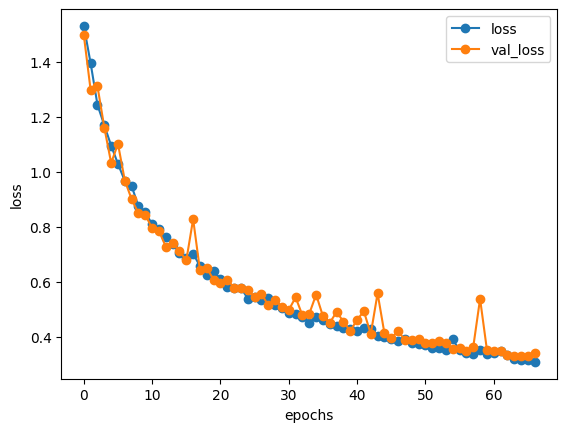

In [130]:
def history_plot(history):
  plt.plot(history['loss'][3:], label='loss', marker='o')
  plt.plot(history['val_loss'][3:], label='val_loss', marker='o')
  plt.ylabel('loss')
  plt.xlabel('epochs')
  plt.legend()
  plt.show()
history_plot(history)

In [131]:
  y_pred = model.predict(x_test)
  y_pred

19/19 [==============================] - 0s 2ms/step


array([[9.3984824e-01, 4.4731546e-08, 4.1353931e-05, 1.5404821e-09,
        1.4564290e-04, 5.9964739e-02],
       [6.3919017e-09, 3.6372426e-06, 3.2705255e-02, 9.6120524e-01,
        6.0855774e-03, 2.3466913e-07],
       [3.3634820e-04, 5.5204930e-09, 1.2816751e-03, 3.9397299e-04,
        9.9796927e-01, 1.8690334e-05],
       ...,
       [6.1010223e-07, 2.5837901e-03, 9.9509454e-01, 2.5951485e-05,
        3.2931352e-05, 2.2622093e-03],
       [1.6571481e-04, 5.5321775e-06, 6.3506377e-06, 1.3472276e-13,
        5.3629612e-10, 9.9982244e-01],
       [1.9495239e-17, 9.9994171e-01, 5.0265888e-05, 9.6758003e-14,
        6.4093560e-18, 7.9818101e-06]], dtype=float32)

In [132]:
# 최대 값을 찾자
y_test = y_test.map({'STANDING':0,
             'LAYING':1,
             'WALKING':2,
             'WALKING_DOWNSTAIRS':3,
             'WALKING_UPSTAIRS':4,
             'SITTING':5})
y_pred = np.argmax(y_pred, axis=1)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 94   0   0   0   0   8]
 [  0 114   0   0   0   0]
 [  0   0 112   0   0   0]
 [  0   0   3  74   0   0]
 [  0   0   4   0  77   0]
 [  5   0   0   0   0  98]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       102
           1       1.00      1.00      1.00       114
           2       0.94      1.00      0.97       112
           3       1.00      0.96      0.98        77
           4       1.00      0.95      0.97        81
           5       0.92      0.95      0.94       103

    accuracy                           0.97       589
   macro avg       0.97      0.96      0.97       589
weighted avg       0.97      0.97      0.97       589



In [133]:
new_row = pd.DataFrame({'name':['DL'], 'cv_score_all': [accuracy_score(y_test, y_pred)]})
result = pd.concat([result,new_row], axis=0)
result

,name,cv_score_all
0,LR,0.708955
1,KNN,0.962212
2,DT,0.912888
3,RF,0.936322
4,XGB,0.991119
5,LGBM,0.993197
6,SVM,0.986016
0,DL,0.966044


In [134]:
temp = list()
temp += ['dsf']
temp

['dsf']

In [135]:
top_feature = list(features.sort_values(by='activity_importance', ascending=False)[:100]['feature_name'].values)
top_feature.append('Activity')
data.loc[:, top_feature]


,tGravityAcc-mean()-X,"angle(X,gravityMean)",tGravityAcc-energy()-X,tGravityAcc-mean()-Y,tGravityAcc-min()-X,"angle(Y,gravityMean)",tGravityAcc-min()-Y,tGravityAcc-max()-X,tGravityAcc-energy()-Y,tBodyAccJerk-std()-X,...,tBodyAccMag-max(),tBodyAccJerk-energy()-X,"fBodyAccJerk-bandsEnergy()-1,24.2","fBodyAccJerk-bandsEnergy()-1,24.1",tBodyAccJerkMag-std(),tBodyAccJerk-iqr()-Y,fBodyAccJerk-energy()-Y,tGravityAccMag-energy(),tBodyGyroJerk-mad()-Z,Activity
0,0.875254,-0.601120,0.673768,-0.358842,0.891969,0.331298,-0.334921,0.805627,-0.775936,-0.987135,...,-0.975728,-0.999830,-0.999688,-0.999708,-0.990259,-0.979984,-0.999720,-0.999395,-0.985623,STANDING
1,-0.134711,0.345205,-0.893830,0.924656,-0.095343,-0.769186,0.937432,-0.200892,0.714508,-0.990694,...,-0.989955,-0.999893,-0.999636,-0.999908,-0.992346,-0.990136,-0.999892,-0.999816,-0.990121,LAYING
2,0.965965,-0.833564,0.906252,-0.174095,0.985606,0.202434,-0.145801,0.891615,-0.953043,-0.994537,...,-0.991692,-0.999948,-0.999787,-0.999491,-0.988836,-0.976296,-0.999429,-0.999913,-0.990426,STANDING
3,0.927343,-0.695819,0.805419,-0.297703,0.943954,0.287154,-0.275699,0.858160,-0.849096,-0.240408,...,-0.258592,-0.708350,-0.814915,-0.678856,-0.291206,-0.188099,-0.674814,-0.619476,-0.419305,WALKING
4,0.901125,-0.705029,0.738738,-0.260540,0.901943,0.264952,-0.263482,0.858531,-0.885215,-0.147723,...,0.160197,-0.633311,-0.942707,-0.804809,-0.235142,-0.576064,-0.836659,-0.404608,-0.634217,WALKING_DOWNSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,0.973223,-0.912365,0.925506,-0.044093,0.992398,0.114009,-0.027374,0.899036,-0.998616,-0.991070,...,-0.963586,-0.999899,-0.999627,-0.999691,-0.989238,-0.980777,-0.999656,-0.998172,-0.986515,SITTING
5877,0.910932,-0.690278,0.763412,-0.317517,0.921001,0.303194,-0.291398,0.843681,-0.826961,-0.269783,...,-0.202945,-0.730615,-0.955215,-0.667505,-0.400074,-0.122426,-0.701001,-0.574805,-0.677284,WALKING_UPSTAIRS
5878,-0.514220,0.620363,-0.998561,0.684910,-0.465011,-0.437247,0.700942,-0.579367,-0.046641,-0.985539,...,-0.986655,-0.999797,-0.999815,-0.999821,-0.991058,-0.985324,-0.999763,-0.999881,-0.993142,LAYING
5879,0.921553,-0.718009,0.790552,-0.302780,0.932387,0.292856,-0.293450,0.852565,-0.843467,-0.207507,...,-0.141070,-0.683215,-0.958866,-0.650324,-0.297046,-0.382279,-0.723597,-0.514370,-0.342907,WALKING_UPSTAIRS


In [136]:
def top_data(top_num, data, data_test):
  # 상위 데이터
  top_feature = list(features.sort_values(by='activity_importance', ascending=False)[:100]['feature_name'].values)
  top_feature.append('Activity')
  data = data.loc[:, top_feature]
  data_test = data_test.loc[:, top_feature]
  print(f'train data shape :{data.shape}, test data shape : {data_test.shape}')

  # 데이터 전처리
  target = 'Activity'
  x_train = data.drop(target, axis=1)
  y_train = data.loc[:, target]
  x_test = data_test.drop(target, axis=1)
  y_test = data_test.loc[:, target]

  # 스케일링
  scaler = MinMaxScaler()
  x_train = scaler.fit_transform(x_train)
  x_test = scaler.transform(x_test)

  # 정수 encoding
  y_train = y_train.map({'STANDING':0,
             'LAYING':1,
             'WALKING':2,
             'WALKING_DOWNSTAIRS':3,
             'WALKING_UPSTAIRS':4,
             'SITTING':5})
  y_test = y_test.map({'STANDING':0,
             'LAYING':1,
             'WALKING':2,
             'WALKING_DOWNSTAIRS':3,
             'WALKING_UPSTAIRS':4,
             'SITTING':5})
  score_name = 'cv_score_100'
  result.loc[:,score_name] = 0
  # LR
  name='LR'
  model = LinearRegression()
  get_cv_score(name, model, score_name=score_name)
  # KNN
  name='KNN'
  model = KNeighborsClassifier()
  get_cv_score(name, model, score_name=score_name)
  # DT
  name='DT'
  model = DecisionTreeClassifier(max_depth=5)
  get_cv_score(name, model, score_name=score_name)
  # RF
  name='RF'
  model = RandomForestClassifier(max_depth=5)
  get_cv_score(name, model, score_name=score_name)
  # XGB
  name='XGB'
  model = XGBClassifier(max_depth=5)
  get_cv_score(name, model, score_name=score_name)
  # LGBM
  name='LGBM'
  model = LGBMClassifier(max_depth=5)
  get_cv_score(name, model, score_name=score_name)
  # SVM
  name='SVM'
  model = SVC(kernel='linear')
  get_cv_score(name, model, score_name=score_name)
  # DL
  name='DL'
  clear_session()
  intensity = 0.001
  model = Sequential([Dense(256, input_shape=(x_train.shape[1],), activation='relu', kernel_regularizer = l1(intensity)),
                      Dense(128, activation='relu',kernel_regularizer = l1(intensity)),
                      Dense(64, activation='relu',kernel_regularizer = l1(intensity)),
                      Dense(32, activation='relu',kernel_regularizer = l1(intensity)),
                      Dense(16, activation='relu',kernel_regularizer = l1(intensity)),
                      Dense(6, activation='softmax')
                      ])
  model.summary()
  model.compile(optimizer=Adam(learning_rate=0.0005), loss='sparse_categorical_crossentropy')
  es = EarlyStopping(monitor='val_loss', min_delta = 0.02, patience=10)
  history = model.fit(x_train, y_train, epochs=100, validation_split=0.2, verbose=0, callbacks=[es]).history
  history_plot(history)
  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred, axis=1)
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

  result.loc[result['name']==name,score_name] = accuracy_score(y_test, y_pred)
  display(result)

In [ ]:
data_c = data.copy()
data_t_c = data_test.copy()
top_data(100, data_c, data_t_c) # 상위 100개 데이터 반복


train data shape :(5881, 101), test data shape : (1471, 101)
LR cv score :  0.7089547168953251
KNN cv score :  0.9622124335699255
DT cv score :  0.9123215750615257
RF cv score :  0.9376448978136036
XGB cv score :  0.9911185219531335
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.066831 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 140155
[LightGBM] [Info] Number of data points in the train set: 4762, number of used features: 562
[LightGBM] [Info] Start training from score -1.681706
[LightGBM] [Info] Start training from score -1.664918
[LightGBM] [Info] Start training from score -1.787568
[LightGBM] [Info] Start training from score -2.002278


In [ ]:
result

#**스마트폰 센서 데이터 기반 모션 분류**
# 단계3 : 단계별 모델링


## 0.미션

단계별로 나눠서 모델링을 수행하고자 합니다.  

* 단계1 : 정적(0), 동적(1) 행동 분류 모델 생성
* 단계2 : 세부 동작에 대한 분류모델 생성
    * 단계1 모델에서 0으로 예측 -> 정적 행동 3가지 분류 모델링
    * 단계1 모델에서 1으로 예측 -> 동적 행동 3가지 분류 모델링
* 모델 통합
    * 두 단계 모델을 통합하고, 새로운 데이터에 대해서 최종 예측결과와 성능평가가 나오도록 함수로 만들기
* 성능 비교
    * 기본 모델링의 성능과 비교
    * 모든 모델링은 [다양한 알고리즘 + 성능 튜닝]을 수행해야 합니다.


## 1.환경설정

### (1) 라이브러리 불러오기

* 세부 요구사항
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 머신 러닝 모델
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 딥러닝 모델
from keras.backend import clear_session
from keras.models import Sequential, Model
from keras.layers import Dense, Input, SimpleRNN, LSTM
from keras.optimizers import Adam

# 모델 평가
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from google.colab import drive
import joblib

In [ ]:
drive.mount('/content/drive')

In [ ]:
project_path = '/content/drive/MyDrive/미니 프로젝트/'

### (2) 데이터 불러오기

* 주어진 데이터셋
    * data01_train.csv : 학습 및 검증용

 <br/>  

* 세부 요구사항
    - data01_train.csv 를 불러와 'data' 이름으로 저장합니다.
        - data에서 변수 subject는 삭제합니다.
    - data01_test.csv 를 불러와 'new_data' 이름으로 저장합니다.


In [ ]:
data = pd.read_csv(project_path+'data01_train.csv')
new_data = pd.read_csv(project_path+'data01_test.csv')

In [ ]:
data.drop('subject', axis=1, inplace=True)
new_data.drop('subject', axis=1, inplace=True)

## 2.데이터 전처리

* 세부 요구사항
    - Label 추가 : data 에 Activity_dynamic 를 추가합니다. Activity_dynamic은 과제1에서 is_dynamic과 동일한 값입니다.
    - x와 y1, y2로 분할하시오.
        * y1 : Activity
        * y2 : Activity_dynamic
    - train : val = 8 : 2 혹은 7 : 3
    - random_state 옵션을 사용하여 다른 모델과 비교를 위해 성능이 재현되도록 합니다.

In [ ]:
# data_copy = data.copy()
# new_data_copy = data.copy()
data['Activity_dynamic'] = data['Activity'].replace(['STANDING', 'SITTING', 'LAYING'], 0)
data.loc[data['Activity_dynamic']!=0,'Activity_dynamic'] = 1
data.head()

In [ ]:
target1 = 'Activity'
target2 = 'Activity_dynamic'

# top 100 data
# ft_data = joblib.load(project_path + 'features_df.pkl')
# top100_feature = list(ft_data.sort_values(by='activity_importance', ascending=False)['feature_name'][:100].values)
# top100_feature = list(set(top100_feature))
# top100_feature += [target1, target2]
# data = data.loc[:, top100_feature]

# data
x = data.drop(columns=[target1, target2], axis=1)
y1 = data.loc[:, target1]
y2 = data.loc[:, target2].astype(int)
print(x.shape, y1.shape)

from sklearn.model_selection import train_test_split

x_train, x_test, y1_train, y1_test = train_test_split(x, y1, test_size=0.1)
x_train, x_test, y2_train, y2_test = train_test_split(x, y2, test_size=0.1)
print(x_train.shape, y1_test.shape)

#### 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
# joblib.dump(scaler, 'scaler.pkl')
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## **3.단계별 모델링**

![](https://github.com/DA4BAM/image/blob/main/step%20by%20step.png?raw=true)

### (1) 단계1 : 정적/동적 행동 분류 모델

* 세부 요구사항
    * 정적 행동(Laying, Sitting, Standing)과 동적 행동(동적 : Walking, Walking-Up, Walking-Down)을 구분하는 모델 생성.
    * 몇가지 모델을 만들고 가장 성능이 좋은 모델을 선정하시오.

In [ ]:
algorithms = ['LR', 'KNN', 'DT', 'RF', 'XGB', 'LGBM', 'SVM', 'DL'] # 분류
result = pd.DataFrame({'name':algorithms})
result

In [ ]:
y2_test.value_counts()

In [ ]:
# 성능 저장하는 함수
def get_score_dynamic(name ,model, x_train, y_train, x_test, y_test, score_name):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)

    if not score_name in result.columns:
      result[score_name] = 0
    result.loc[result['name']==name, score_name] = accuracy
    print(f'{name} accuracy score : {accuracy}')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

#### 1) 알고리즘1 : LR

In [ ]:
score_name = 'Activity_dynamic'
name = 'LR'
model = LogisticRegression(max_iter=500)
get_score_dynamic(name ,model, x_train, y2_train, x_test, y2_test, score_name)
result

#### 2) 알고리즘2 : KNN

In [ ]:
name = 'KNN'
model = KNeighborsClassifier()
get_score_dynamic(name ,model, x_train, y2_train, x_test, y2_test, score_name)

In [ ]:
# DT
name = 'DT'
model = DecisionTreeClassifier(max_depth=5)
get_score_dynamic(name ,model, x_train, y2_train, x_test, y2_test, score_name)

In [ ]:
# RF
name = 'RF'
model = RandomForestClassifier(max_depth=5)
get_score_dynamic(name ,model, x_train, y2_train, x_test, y2_test, score_name)
# joblib.dump(model, 'is_dynamic.pkl')

In [ ]:
# svm
name = 'SVM'
model = SVC(kernel='linear')
get_score_dynamic(name ,model, x_train, y2_train, x_test, y2_test, score_name)
# joblib.dump(model, 'is_dynamic_svm.pkl')

In [ ]:
# xgb
name = 'XGB'
model = XGBClassifier(max_depth=5)
get_score_dynamic(name ,model, x_train, y2_train, x_test, y2_test, score_name)

In [ ]:
# lgbm
name = 'LGBM'
model = LGBMClassifier(max_depth=5, verbose=-1)
get_score_dynamic(name ,model, x_train, y2_train, x_test, y2_test, score_name)

In [ ]:
result

### (2) 단계2-1 : 정적 동작 세부 분류

* 세부 요구사항
    * 정적 행동(Laying, Sitting, Standing)인 데이터 추출
    * Laying, Sitting, Standing 를 분류하는 모델을 생성
    * 몇가지 모델을 만들고 가장 성능이 좋은 모델을 선정하시오.

In [ ]:
data_static = data.loc[data['Activity_dynamic']==0,:]
data_static.loc[:, 'Activity'].replace({'LAYING':0, 'SITTING':1, 'STANDING':2},inplace=True)
# x, y  분리
x = data_static.drop(columns=[target1, target2], axis=1)
y = data_static.loc[:, target1] # Activity

# 훈련 데이터 , 학습 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [ ]:
score_name = 'only_static'

In [ ]:
name = 'LR'
model = LogisticRegression(max_iter=500)
get_score_dynamic(name ,model, x_train, y_train, x_test, y_test, score_name)

In [ ]:
name = 'KNN'
model = KNeighborsClassifier()
get_score_dynamic(name ,model, x_train, y_train, x_test, y_test, score_name)

In [ ]:
# DT
name = 'DT'
model = DecisionTreeClassifier(max_depth=5)
get_score_dynamic(name ,model, x_train, y_train, x_test, y_test, score_name)

In [ ]:
# RF
name = 'RF'
model = RandomForestClassifier(max_depth=5)
get_score_dynamic(name ,model, x_train, y_train, x_test, y_test, score_name)

In [ ]:
# svm
name = 'SVM'
model = SVC(kernel='linear')
get_score_dynamic(name ,model, x_train, y_train, x_test, y_test, score_name)

In [ ]:
# xgb
name = 'XGB'
model = XGBClassifier(max_depth=5)
get_score_dynamic(name ,model, x_train, y_train, x_test, y_test, score_name)
# joblib.dump(model, 'only_static.pkl')

In [ ]:
x_test

In [ ]:
import re
x_train = x_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x)) # lgbm이 feature에 특수문자가 있는 데이터를 학습 못시킨다고 에러내서 없애는 코드;;

# lgbm
name = 'LGBM'
model = LGBMClassifier(max_depth=5, verbose=-1)
get_score_dynamic(name ,model, x_train, y_train, x_test, y_test, score_name)
# joblib.dump(model, 'only_static_lgbm.pkl')

In [ ]:
result

### (3) 단계2-2 : 동적 동작 세부 분류

* 세부 요구사항
    * 동적 행동(Walking, Walking Upstairs, Walking Downstairs)인 데이터 추출
    * Walking, Walking Upstairs, Walking Downstairs 를 분류하는 모델을 생성
    * 몇가지 모델을 만들고 가장 성능이 좋은 모델을 선정하시오.

In [ ]:
data_d = data.loc[data['Activity_dynamic']==1,:]
data_d.loc[:, 'Activity'].replace({'WALKING':0, 'WALKING_UPSTAIRS':1, 'WALKING_DOWNSTAIRS':2},inplace=True)
# x, y  분리
x = data_d.drop(columns=[target1, target2], axis=1)
y = data_d.loc[:, target1] # Activity

# 훈련 데이터 , 학습 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [ ]:
score_name = 'only_dynamic'

# LR
name = 'LR'
model = LogisticRegression(max_iter=500)
get_score_dynamic(name ,model, x_train, y_train, x_test, y_test, score_name)

# KNN
name = 'KNN'
model = KNeighborsClassifier()
get_score_dynamic(name ,model, x_train, y_train, x_test, y_test, score_name)
# joblib.dump(model, 'only_dynamic_knn.pkl')

# DT
name = 'DT'
model = DecisionTreeClassifier(max_depth=5)
get_score_dynamic(name ,model, x_train, y_train, x_test, y_test, score_name)

# RF
name = 'RF'
model = RandomForestClassifier(max_depth=5)
get_score_dynamic(name ,model, x_train, y_train, x_test, y_test, score_name)

# svm
name = 'SVM'
model = SVC(kernel='linear')
get_score_dynamic(name ,model, x_train, y_train, x_test, y_test, score_name)
# joblib.dump(model, 'only_dynamic_svm.pkl')

# xgb
name = 'XGB'
model = XGBClassifier(max_depth=5)
get_score_dynamic(name ,model, x_train, y_train, x_test, y_test, score_name)

import re
x_train = x_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x)) # lgbm이 feature에 특수문자가 있는 데이터를 학습 못시킨다고 에러내서 없애는 코드;;

# lgbm
name = 'LGBM'
model = LGBMClassifier(max_depth=5, verbose=-1)
get_score_dynamic(name ,model, x_train, y_train, x_test, y_test, score_name)
# joblib.dump(model, 'only_dynamic_lgbm.pkl')

In [ ]:
result

### [선택사항] (4) 분류 모델 합치기


* 세부 요구사항
    * 두 단계 모델을 통합하고, 새로운 데이터(test)에 대해서 최종 예측결과와 성능평가가 나오도록 함수로 만들기
    * 데이터 파이프라인 구축 : test데이터가 로딩되어 전처리 과정을 거치고, 예측 및 성능 평가 수행

![](https://github.com/DA4BAM/image/blob/main/pipeline%20function.png?raw=true)

#### 1) 함수 만들어서 분류 모델 합치기

In [ ]:
def pipeline(data, is_d, only_d, only_s):
  # 데이터 전처리
  del_cols =['subject']
  data = data.drop(columns = del_cols, axis=1) # subject col 제거

  target = 'Activity'
  x = data.drop(target, axis=1) # x, y 나누기
  y = data.loc[:, target]
  print(f'x shape : {x.shape} y shape : {y.shape}')

  x = scaler.transform(x)  # 스케일링

  # 모델 추론
  y_pred1 = is_d.predict(x)  # 동적 행동 여부 모델 결과 저장
  data['is_dynamic_pred'] = y_pred1

  only_d_pred = data.loc[data['is_dynamic_pred']==1, :] # 동적 행동 여부에 따라 데이터 나누기
  only_s_pred = data.loc[data['is_dynamic_pred']==0, :]

  only_d_pred = only_d_pred.iloc[:, :-2] # feature가 아닌 열은 삭제
  only_s_pred = only_s_pred.iloc[:, :-2]

  y_pred2 = only_d.predict(only_d_pred) # is_dynamic에 따라 다른 모델 사용하고 결과 저장
  y_pred3 = only_s.predict(only_s_pred)

  # 결과 저장
  only_d_pred['Activity_pred'] = y_pred2 # 'WALKING':0, 'WALKING_UPSTAIRS':1, 'WALKING_DOWNSTAIRS':2
  only_s_pred['Activity_pred'] = y_pred3 # 'LAYING':0, 'SITTING':1, 'STANDING':2

  # 각각 결과 문자열로 변환
  only_d_pred['Activity_pred'] = only_d_pred['Activity_pred'].replace({0:'WALKING', 1:'WALKING_UPSTAIRS', 2:'WALKING_DOWNSTAIRS'})
  only_s_pred['Activity_pred'] = only_s_pred['Activity_pred'].replace({0:'LAYING', 1:'SITTING', 2:'STANDING'})

  # 하나로 합치기
  print('concat')
  pred = pd.concat([only_d_pred, only_s_pred], axis=0).sort_index() # 합치고 index 정렬
  y_pred = pred['Activity_pred']

  # 평가
  print('accuracy_score :', accuracy_score(y, y_pred))
  print(confusion_matrix(y, y_pred))
  print(classification_report(y, y_pred))

In [ ]:
# 모델 불러오기
is_d_rf = joblib.load(project_path+'is_dynamic_rf.pkl')
only_d_knn = joblib.load(project_path+'only_dynamic_knn.pkl')
only_d_lgbm = joblib.load(project_path+'only_dynamic_lgbm.pkl')
only_d_svm = joblib.load(project_path+'only_dynamic_svm.pkl')
only_s_xgb = joblib.load(project_path+'only_static_xgb.pkl')
only_s_lgbm = joblib.load(project_path+'only_static_lgbm.pkl')
scaler = joblib.load(project_path+'scaler.pkl')

# test 데이터 불러오기
data = pd.read_csv(project_path+'data01_test.csv')

In [ ]:
data2 = data.copy()
pipeline(data2, is_d_rf, only_d_lgbm, only_s_lgbm)

### 딥러닝 결과와 비교

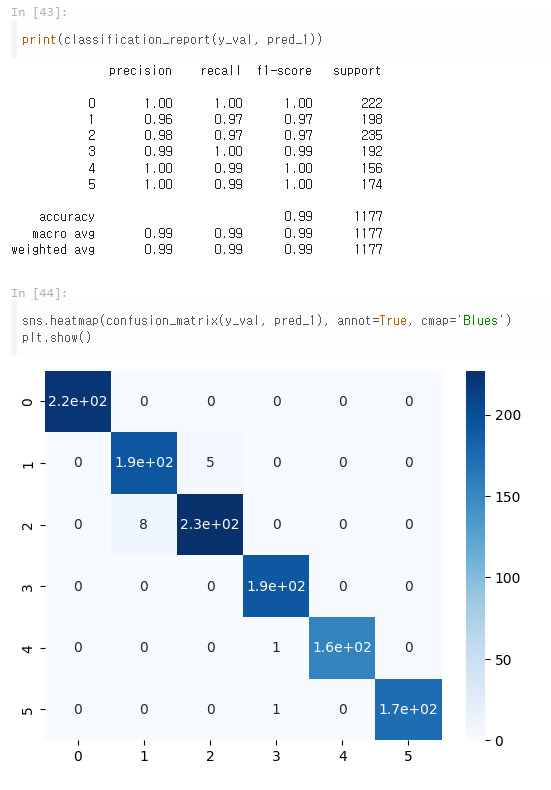